<a href="https://colab.research.google.com/github/jihun0423/Kaggle-London-Bike-prediction/blob/main/London_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd/content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:
df=pd.read_csv("london_merged.csv")

In [ ]:
len(df)

17414

In [ ]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour


In [ ]:
df.head(2)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,6,1


In [ ]:
categorical = ['weather_code','is_holiday','is_weekend','season','month','day','hour']
numerical = ['t1','t2','hum','wind_speed']

array([[<Axes: title={'center': 'timestamp'}>,
        <Axes: title={'center': 'cnt'}>],
       [<Axes: title={'center': 't1'}>, <Axes: title={'center': 't2'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'wind_speed'}>]], dtype=object)

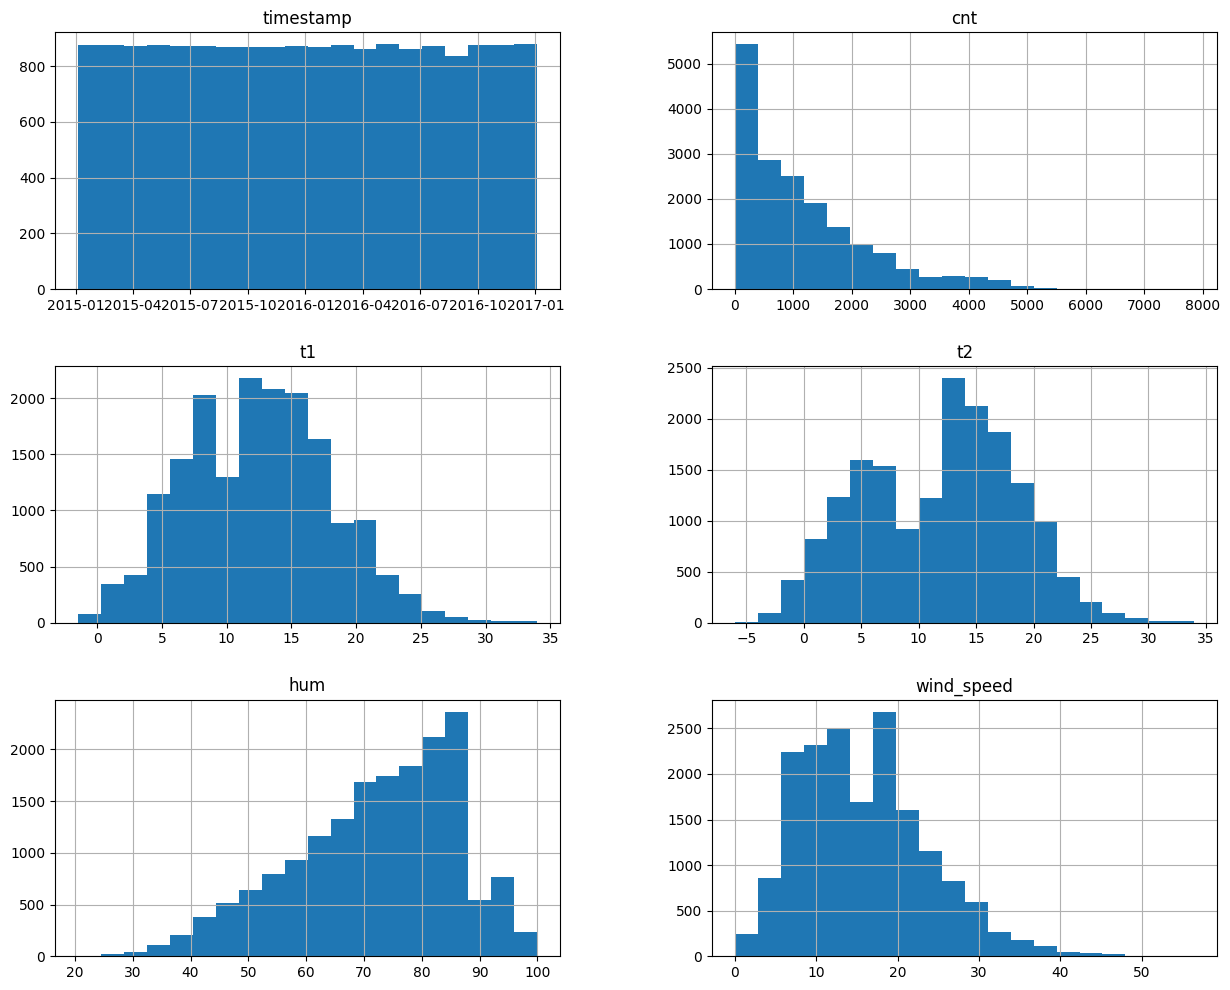

In [ ]:
df.hist(bins=20,figsize=(15,12))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def cat_feat(col):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
    fig.suptitle(col.name+' wise bike_shares',fontsize=15)
    sns.countplot(x=col,data=df,ax=ax[0])
    col.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[1], shadow = True)
    plt.tight_layout()

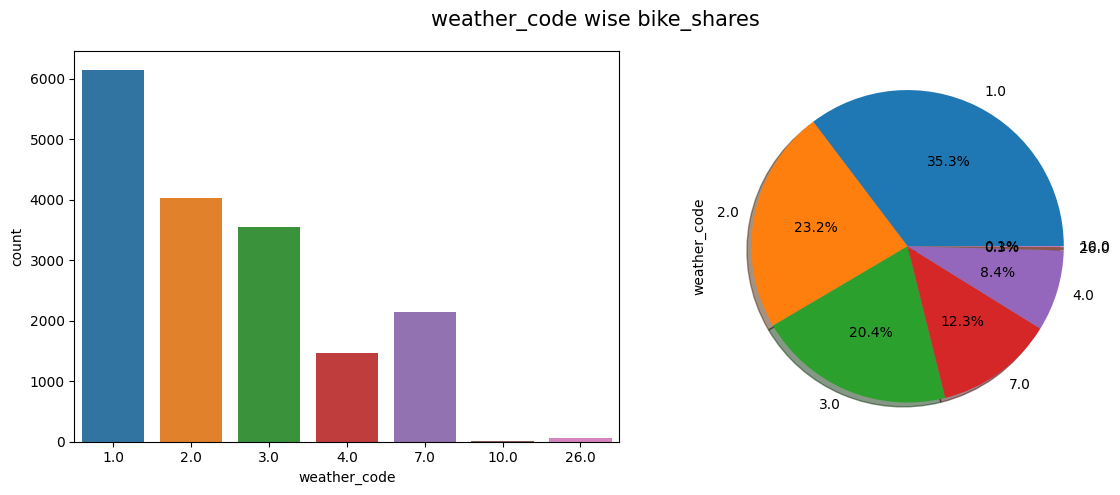

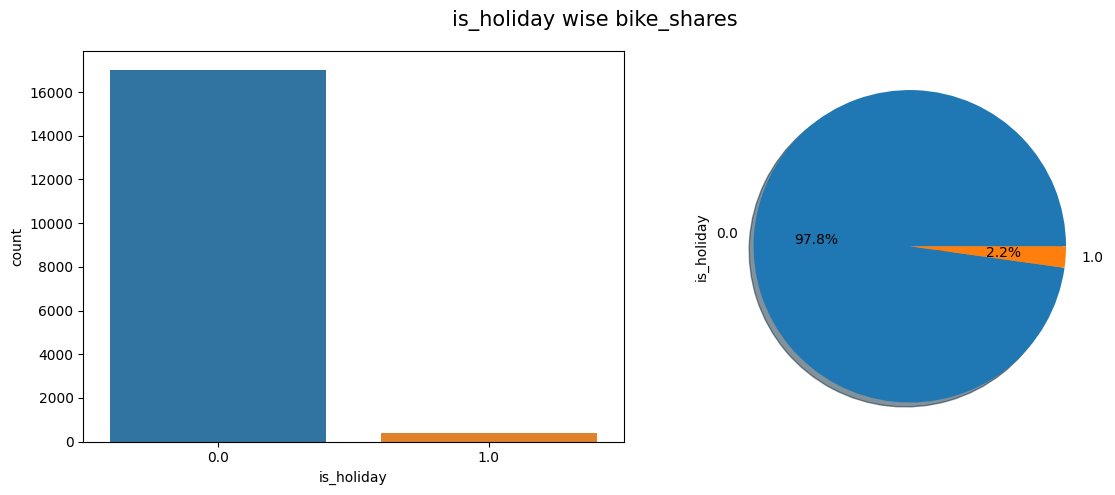

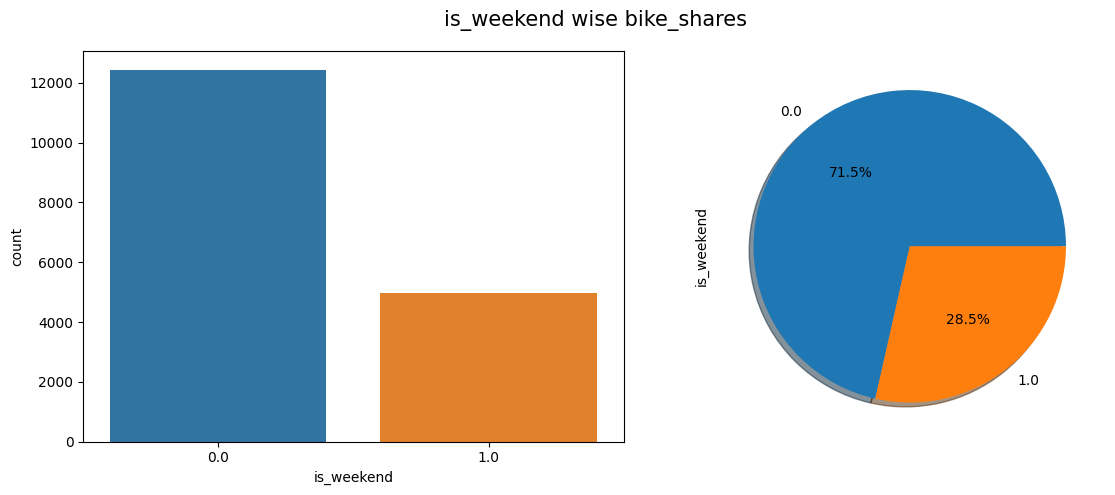

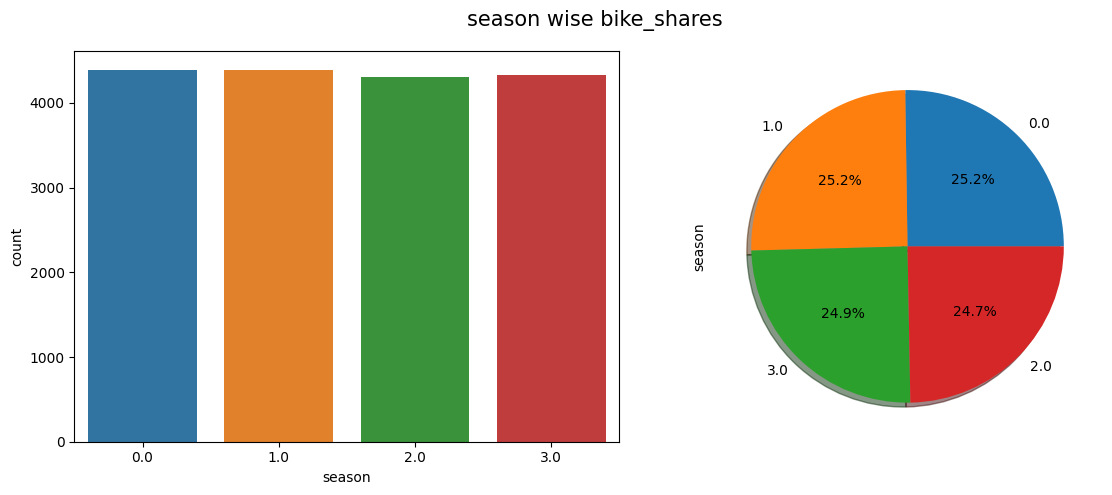

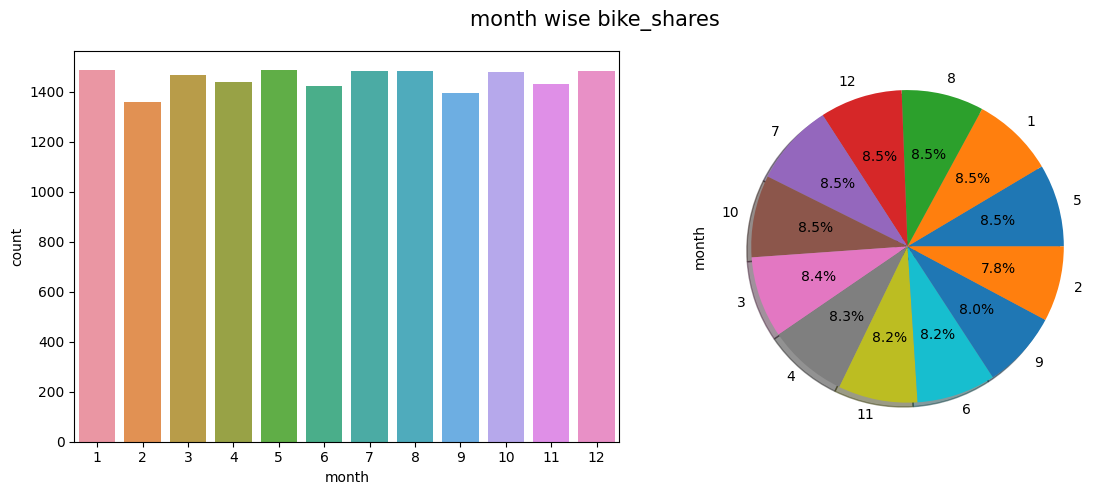

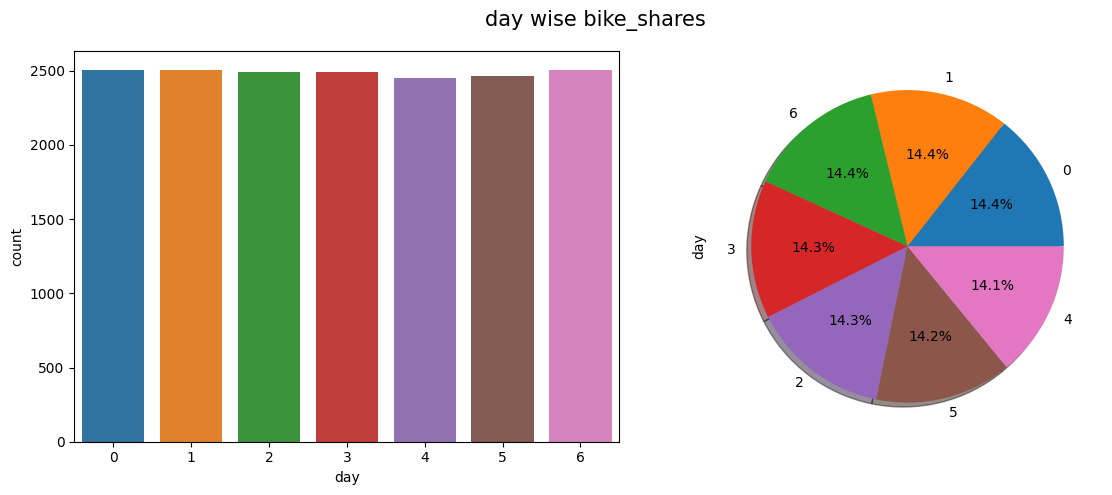

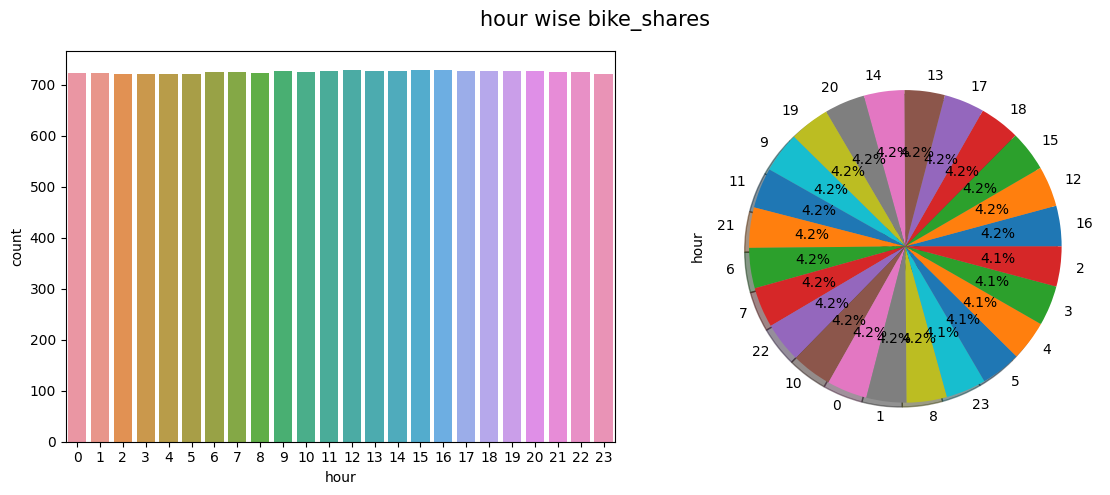

In [ ]:
for i in categorical:
    cat_feat(df[i])

In [ ]:
def boxplot(col):
  fig = plt.subplots(figsize=(18,5))
  plt.title(col.name+' vs wise bike_shares',fontsize=15)
  sns.boxplot(x = col, y = 'cnt', data = df)

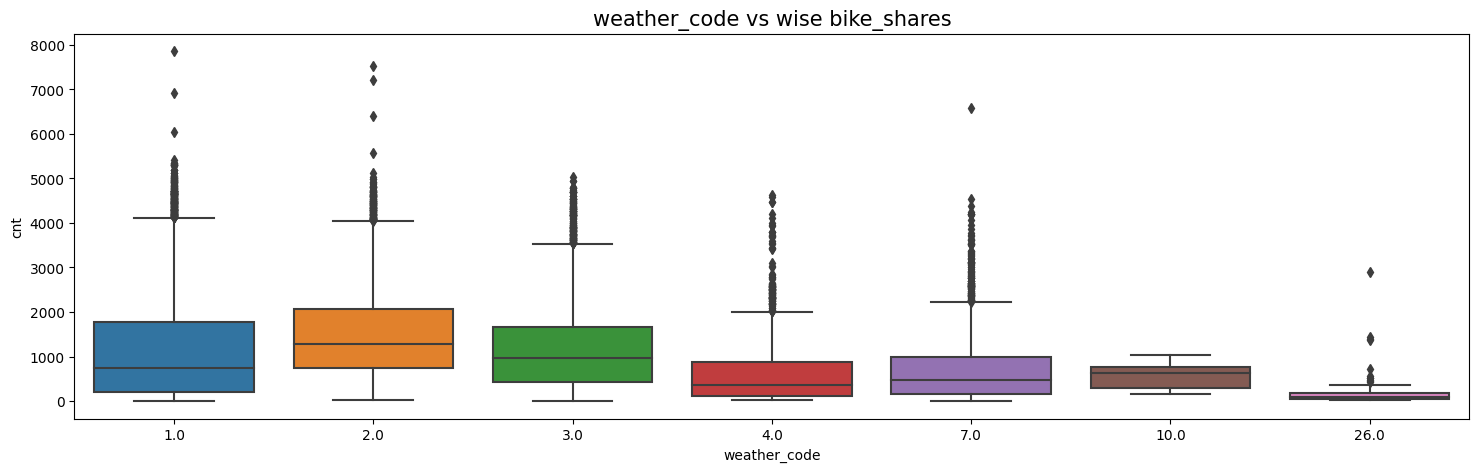

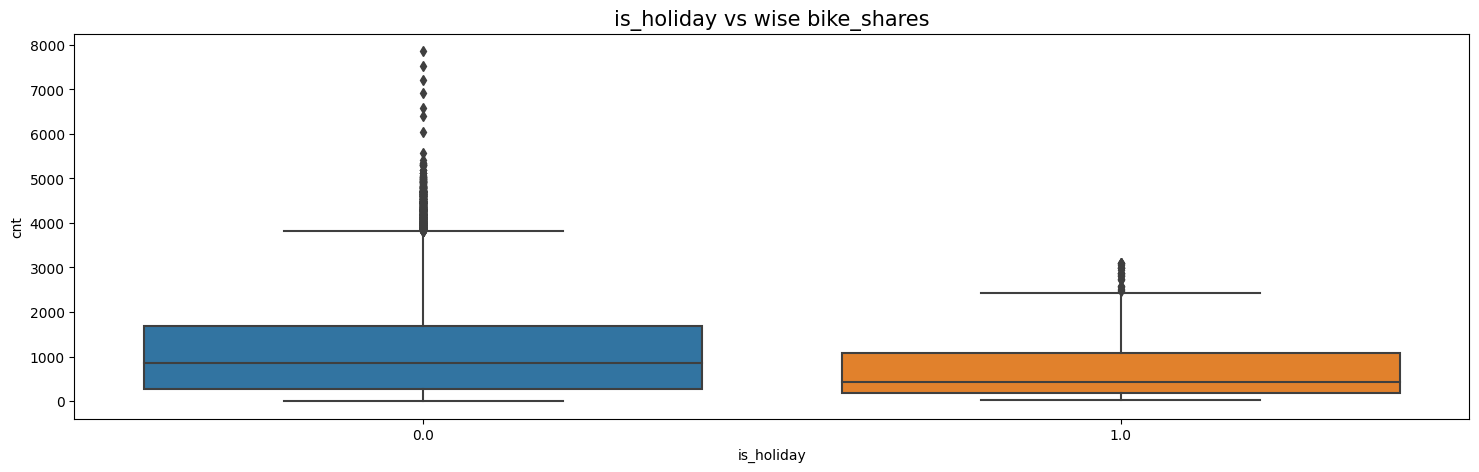

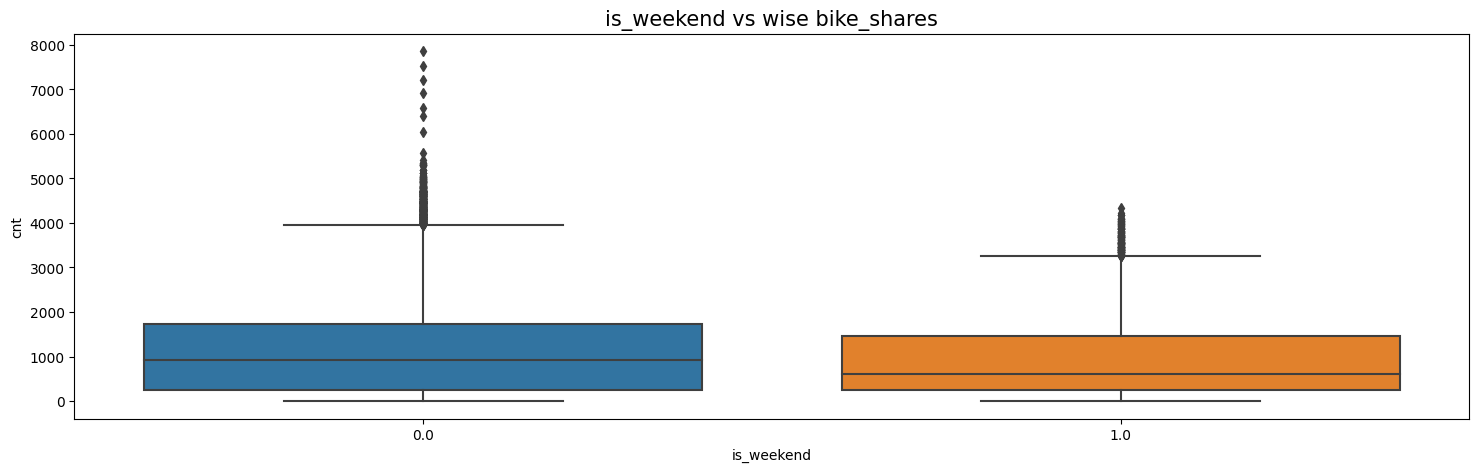

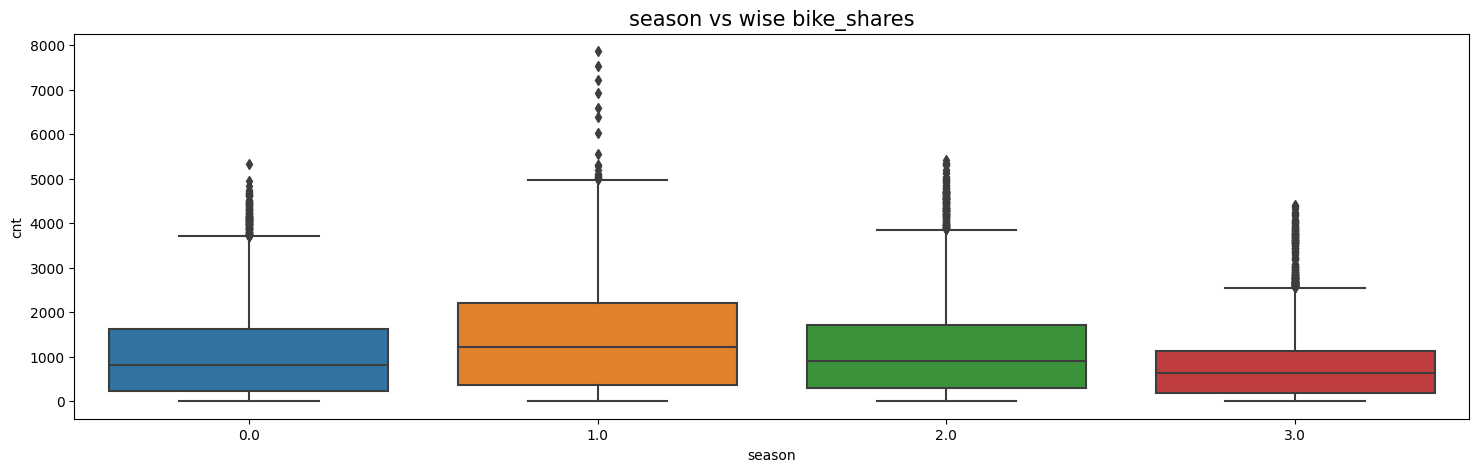

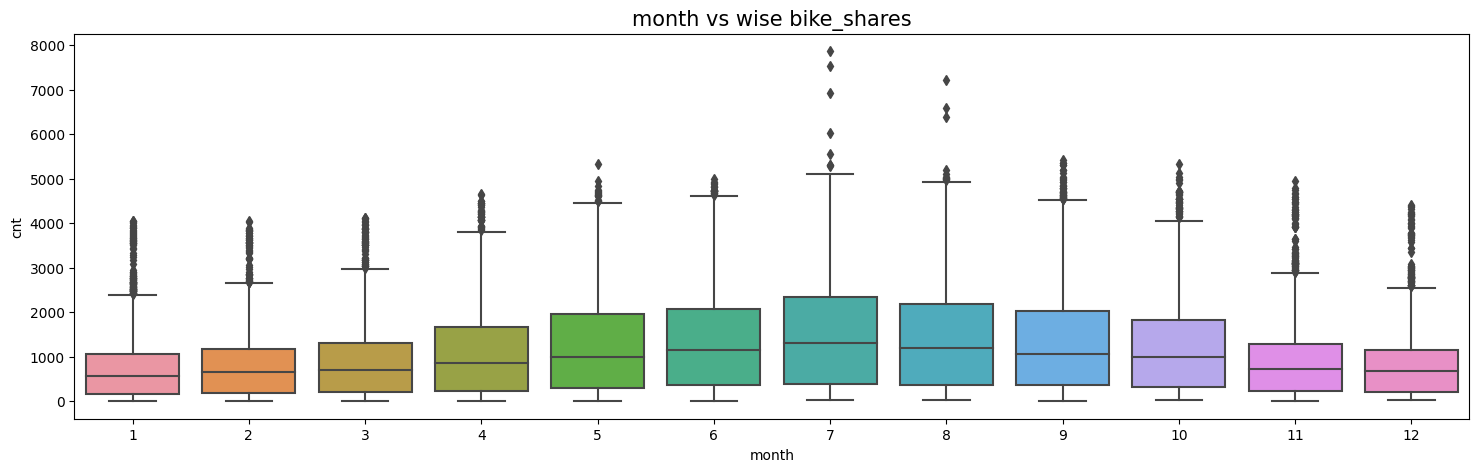

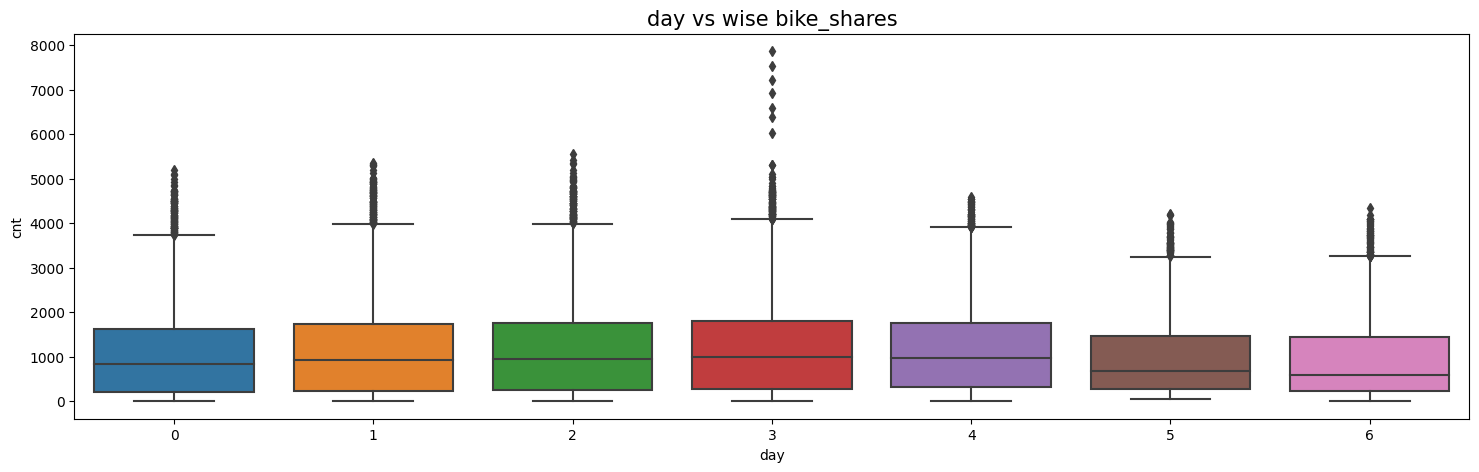

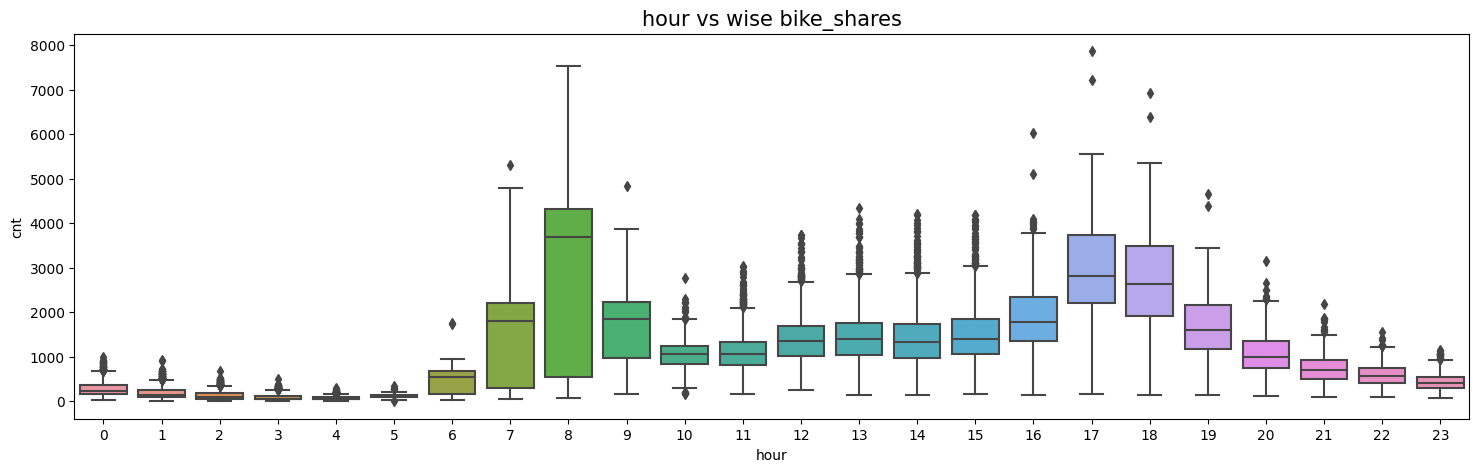

In [ ]:
for i in categorical:
  boxplot(df[i])

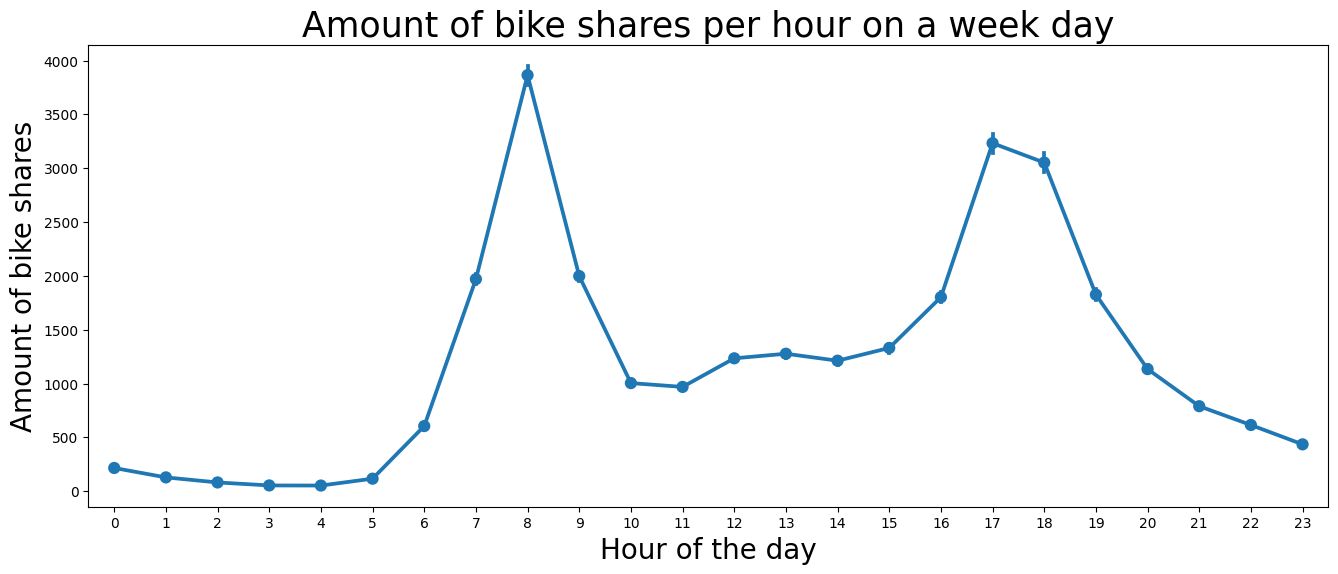

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='cnt',data=df[df["is_weekend"]==0])
ax.set_title("Amount of bike shares per hour on a week day", fontsize=25)
ax.set_xlabel("Hour of the day", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

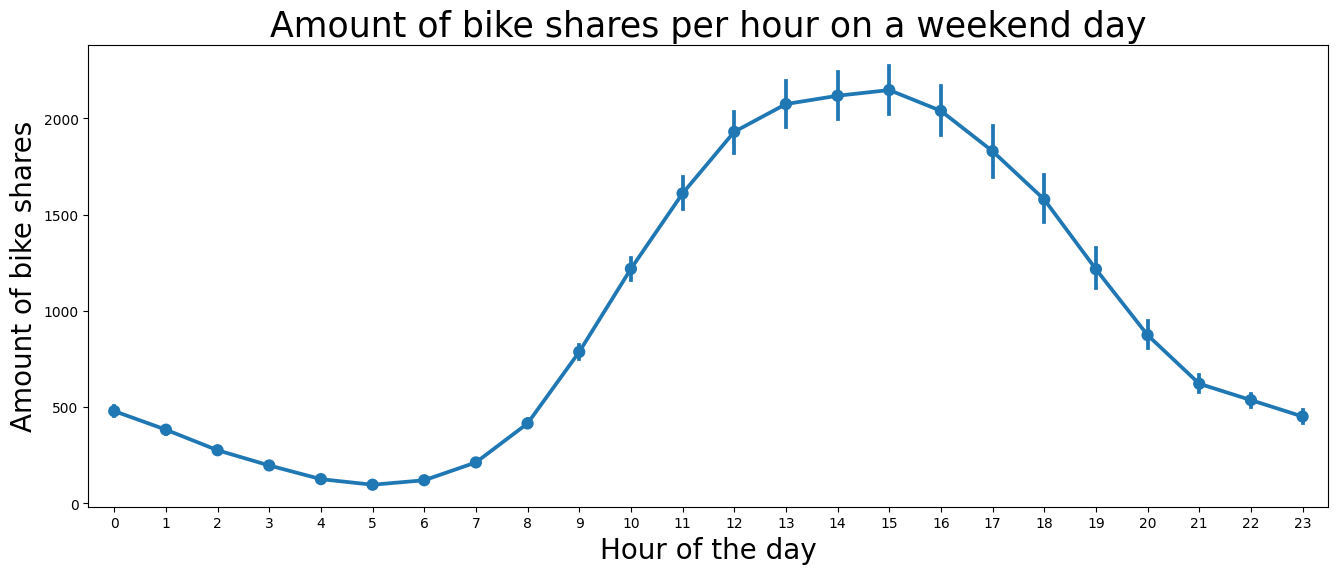

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='cnt',data=df[df["is_weekend"]==1])
ax.set_title("Amount of bike shares per hour on a weekend day", fontsize=25)
ax.set_xlabel("Hour of the day", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

In [ ]:
temp_data=df.loc[:,['timestamp','cnt']]
temp_data = temp_data.set_index("timestamp")

In [ ]:
day_data=temp_data.resample("D").sum()

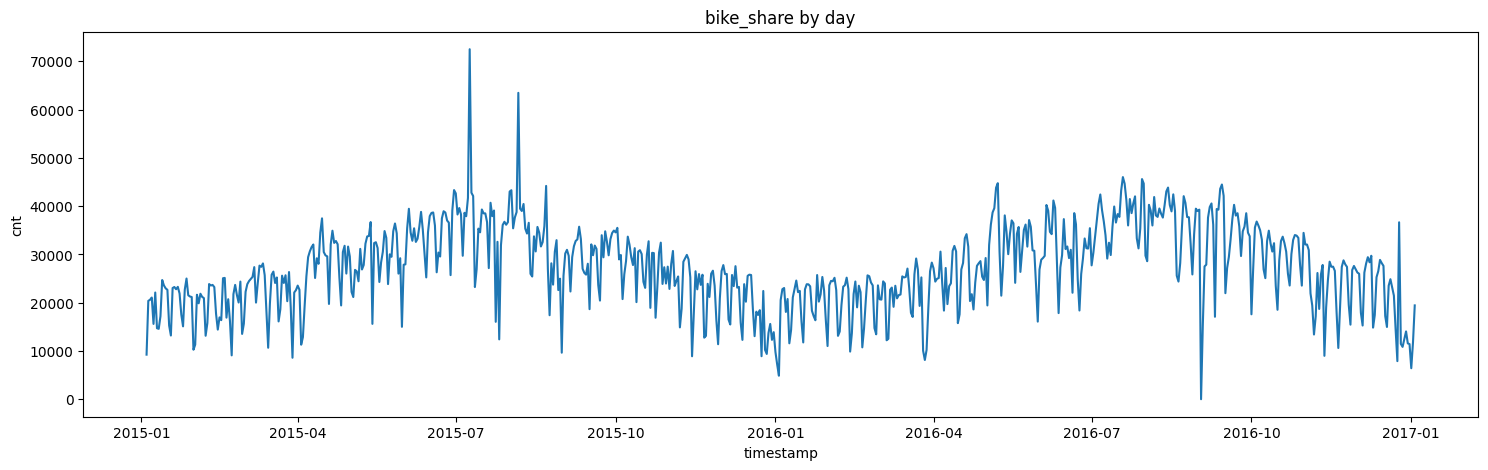

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.lineplot(data=day_data,x=day_data.index,y=day_data['cnt'])
ax.set_title('bike_share by day')
plt.show()

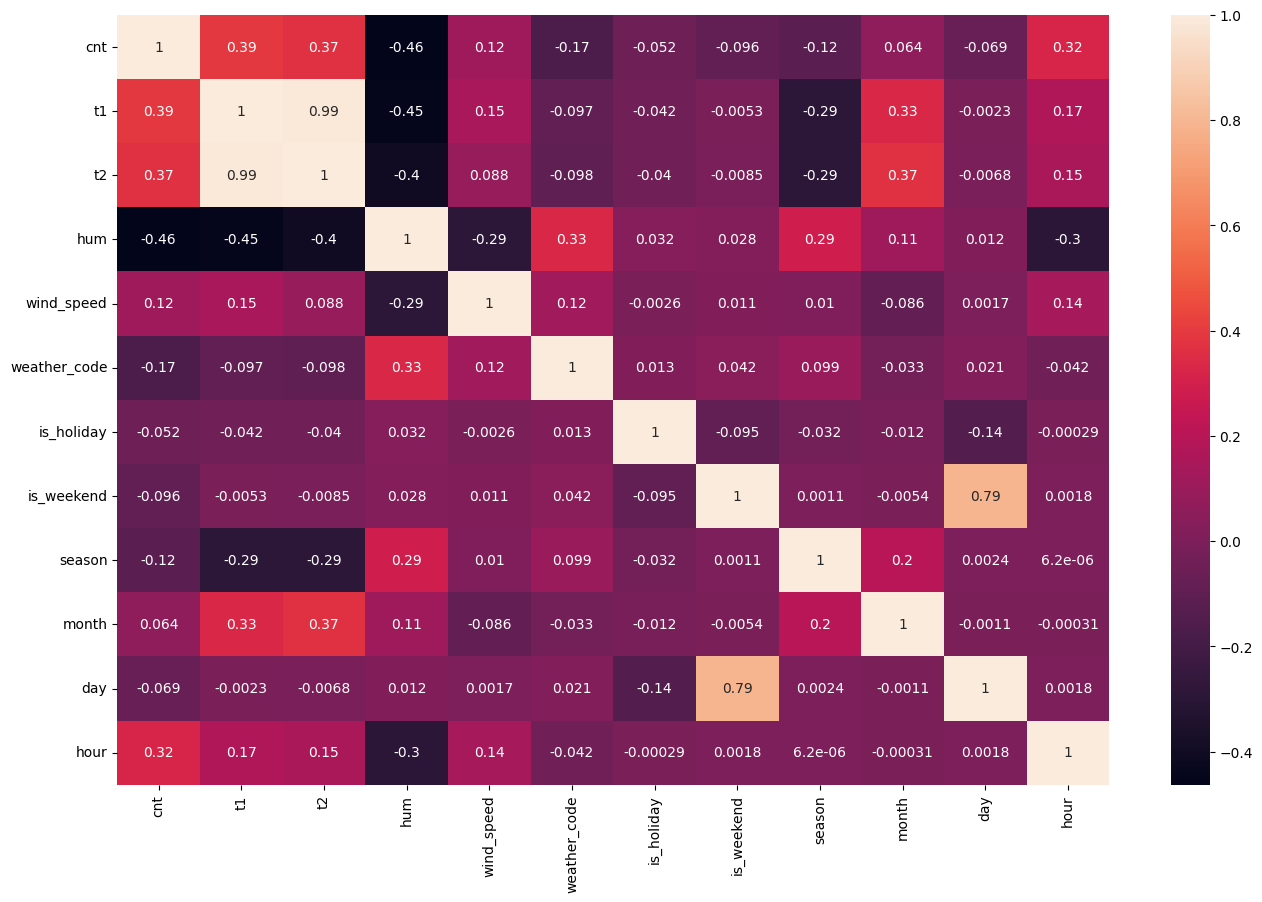

In [ ]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
def check_outliers(col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1
  num = len(df[(df[col]<q1-1.5*IQR) | (df[col]>q3+1.5*IQR)])

  return num

In [ ]:
for col in numerical:
  print(col+' outliers : ',check_outliers(col))


t1 outliers :  64
t2 outliers :  19
hum outliers :  71
wind_speed outliers :  236


In [ ]:
from scipy.stats import norm, boxcox
from scipy import stats
import scipy as scp
import warnings

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis

def check_skewness(col):
  (mu,sigma) = norm.fit(df[col])
  plt.figure(figsize=(20,10))
  plt.subplot(1,2,1)
  sns.distplot(df[col], fit=norm, color="orange")
  plt.title(col.upper() + " Distplot before Skewness Correction", color="black")
  plt.subplot(1,2,2)
  stats.probplot(df[col], plot=plt)
  plt.show();
  print(col+' skewness : ',skew(df[col]),'\t')
  print(col+' kurtosis : ',kurtosis(df[col]), '\n')


<ipython-input-84-a301b4aeac92>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], fit=norm, color="orange")


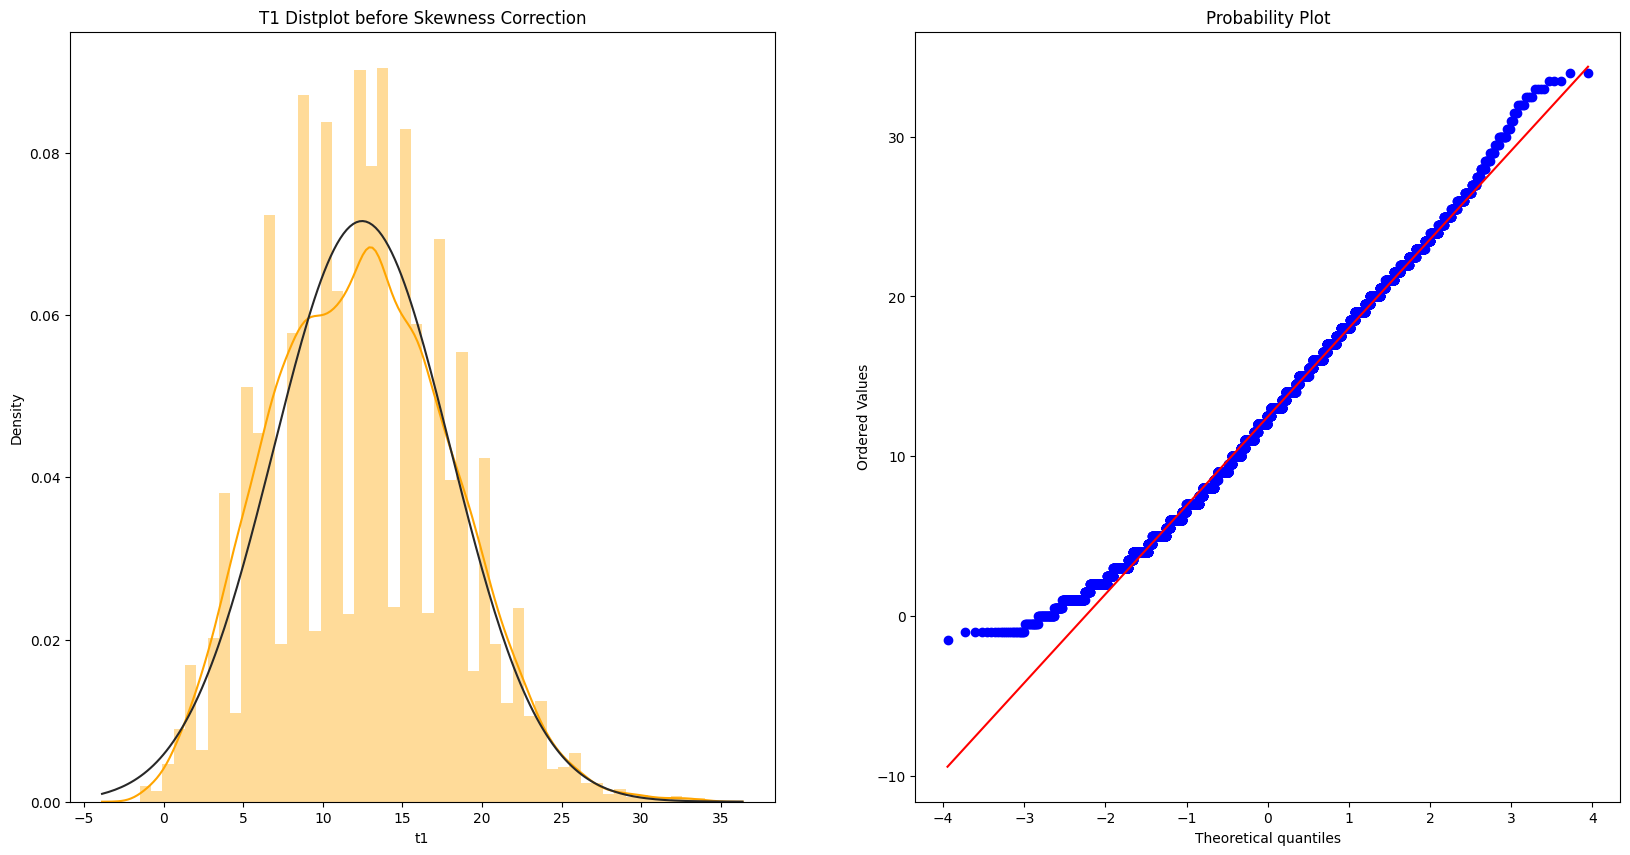

t1 skewness :  0.20384480445558084 	
t1 kurtosis :  -0.26194859084551725 



<ipython-input-84-a301b4aeac92>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], fit=norm, color="orange")


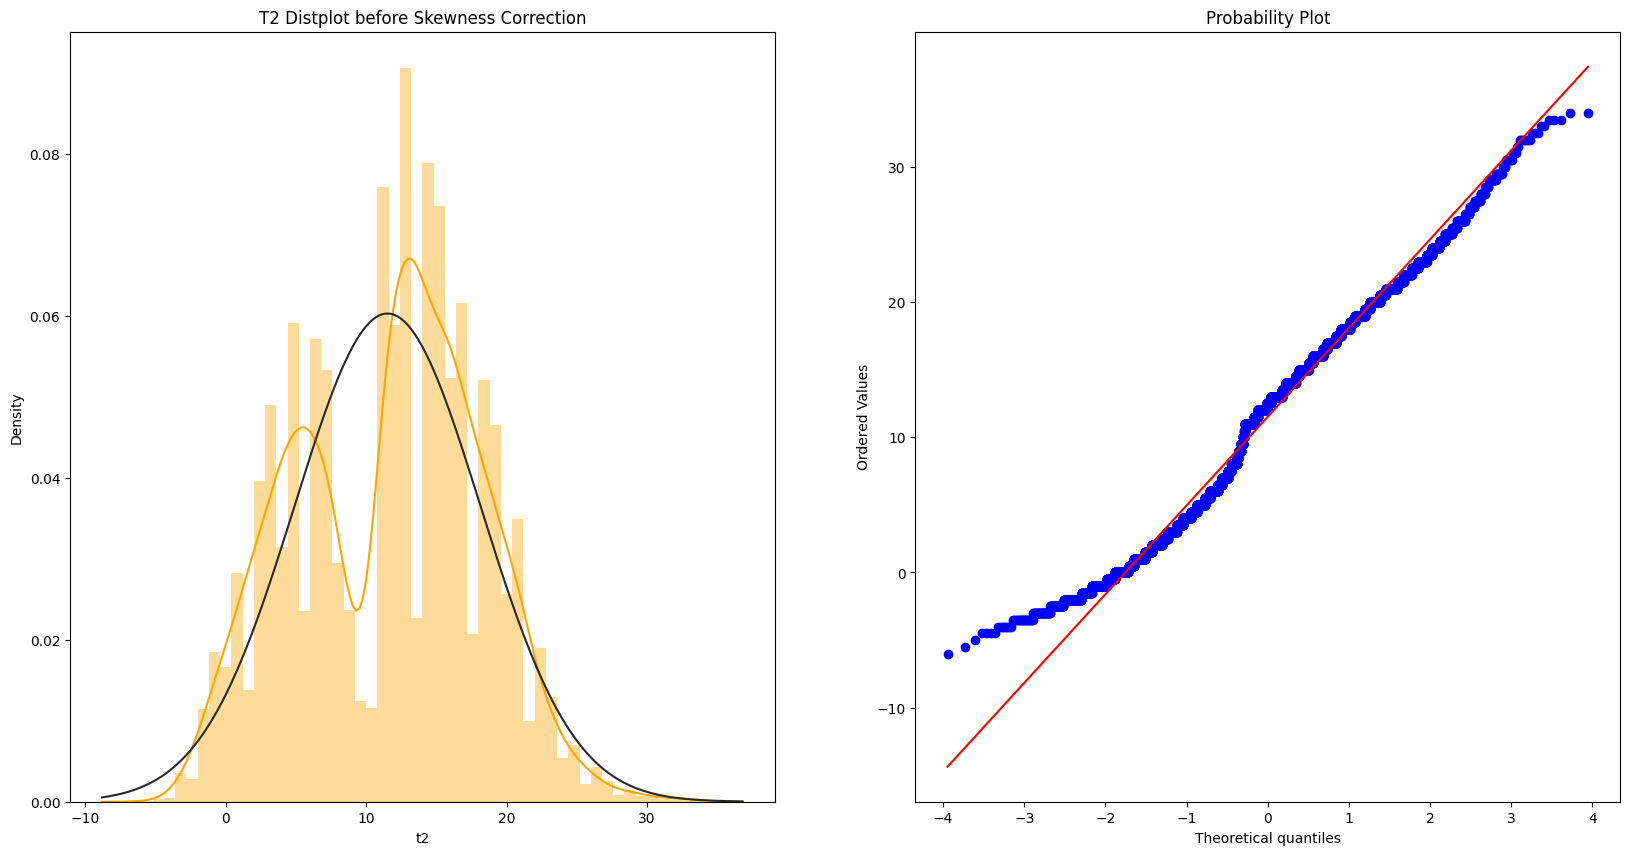

t2 skewness :  -0.058347170427313154 	
t2 kurtosis :  -0.6600590175875585 



<ipython-input-84-a301b4aeac92>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], fit=norm, color="orange")


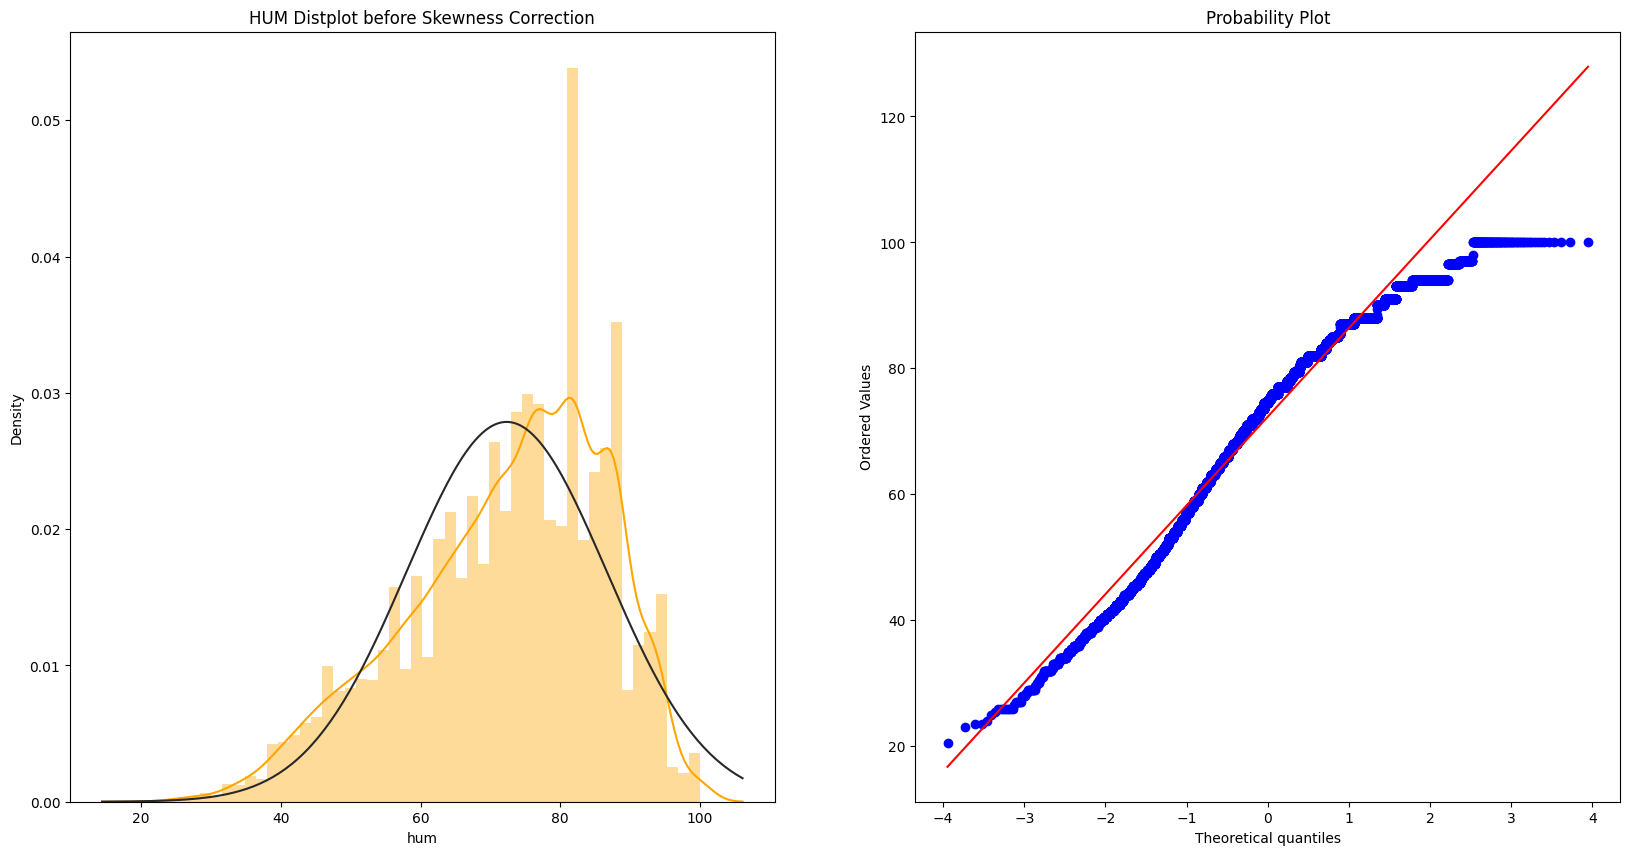

hum skewness :  -0.5727325819296263 	
hum kurtosis :  -0.25603623137838794 



<ipython-input-84-a301b4aeac92>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col], fit=norm, color="orange")


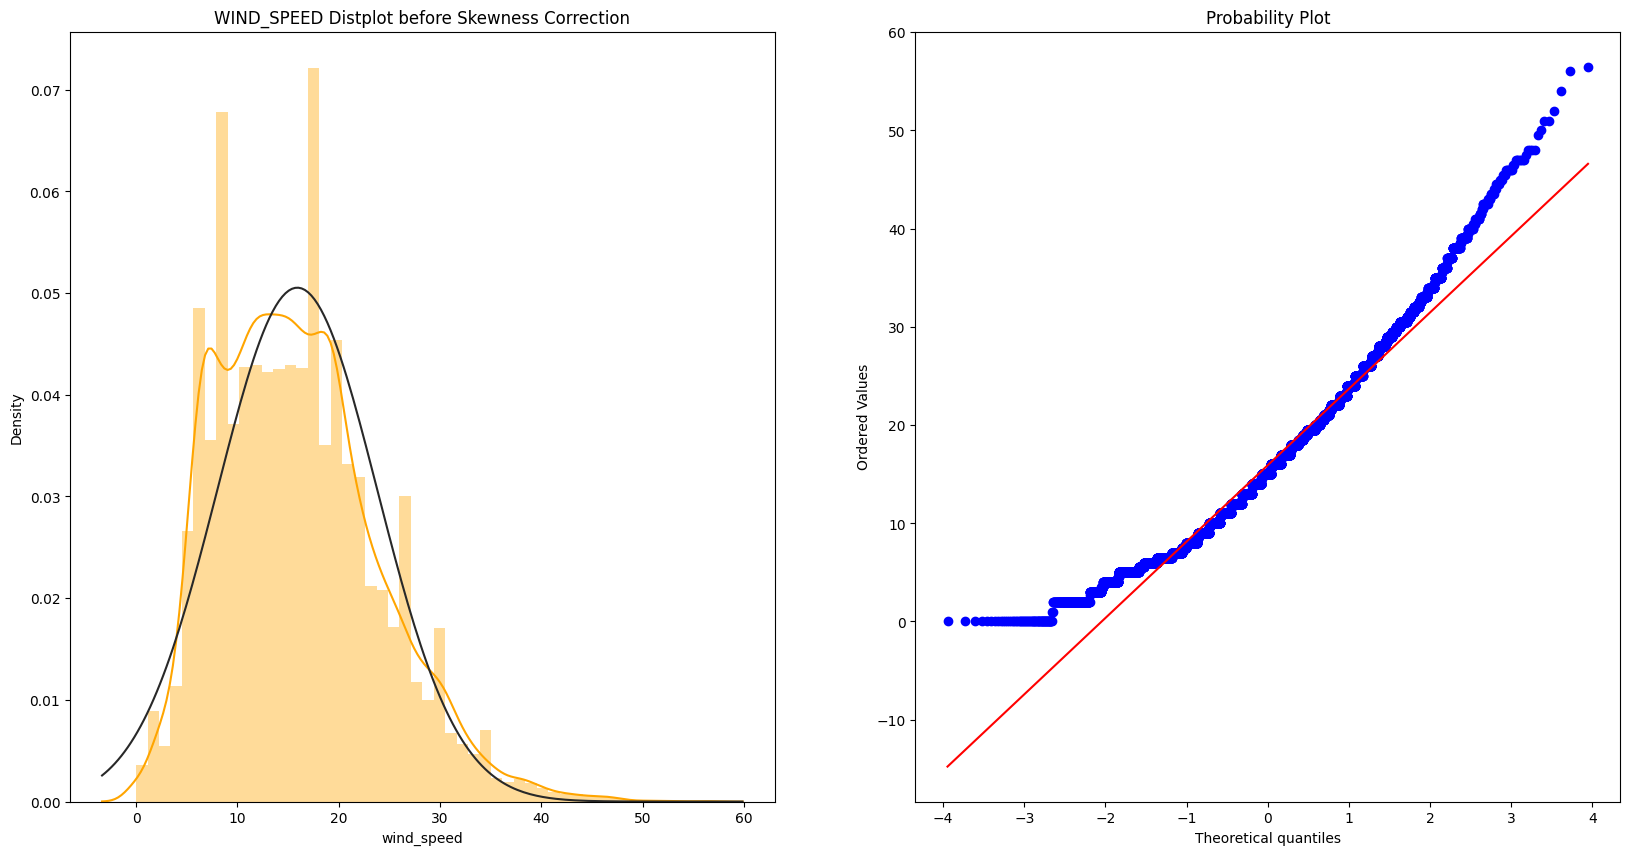

wind_speed skewness :  0.6689536263053214 	
wind_speed kurtosis :  0.4487624716273553 



In [ ]:
for col in numerical:
  check_skewness(col)

In [ ]:
def transformations(col,transformation):
    if transformation=='boxcox':
        try:
            print("BoxCox - "+col)
            temp,temp_params = boxcox(df[col]+1)
            (mu,sigma)=norm.fit(temp)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp, plot = plt)
            print(col+f' skewness after {transformation} : ',skew(temp),'\t')
            print(col+f' kurtosis after {transformation} : ',kurtosis(temp),'\n')

        except ValueError:
            pass
        except ValueError:
            pass
    elif transformation=='log':
        try:
            print("Log - "+col)
            (mu,sigma)=norm.fit(np.log1p(df[col]))
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(np.log1p(df[col]), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(np.log1p(df[col]), plot = plt)

            print(col+f' skewness after {transformation} : ',skew(np.log1p(df[col])),'\t')
            print(col+f' kurtosis after {transformation} : ',kurtosis(np.log1p(df[col])),'\n')

        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='reciprocal':
        try:
            print("Reciprocal - "+col)
            temp_r = 1/df[col]
            temp_r = temp_r.replace([np.inf, -np.inf], 0)
            (mu,sigma)=norm.fit(temp_r)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp_r, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp_r, plot = plt)

            print(col+f' skewness after {transformation} : ',skew(temp_r),'\t')
            print(col+f' kurtosis after {transformation} : ',kurtosis(temp_r),'\n')

        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='sqroot':
        try:
            print("Square_Root - "+col)
            (mu,sigma)=norm.fit(df[col]**(1/2))
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(df[col]**(1/2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(df[col]**(1/2), plot = plt)

            print(col+f' skewness after {transformation} : ',skew(df[col]**(1/2)),'\t')
            print(col+f' kurtosis after {transformation} : ',kurtosis(df[col]**(1/2)),'\n')

        except RuntimeError:
            pass
        except ValueError:
            pass
    else:
        try:
            print("Exponential - "+col)
            (mu,sigma)=norm.fit(df[col]**(1/1.2))
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(df[col]**(1/1.2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(df[col]**(1/1.2), plot = plt)

            print(col+f' skewness after {transformation} : ',skew(df[col]**(1/1.2)),'\t')
            print(col+f' kurtosis after {transformation} : ',kurtosis(df[col]**(1/1.2)),'\n')

        except RuntimeError:
            pass
        except ValueError:
            pass

BoxCox - t2
Log - t2
Reciprocal - t2


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-47-61c670abbdbc>:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_r, fit=norm, color="orange")


t2 skewness after reciprocal :  -0.6523942237473781 	
t2 kurtosis after reciprocal :  24.994891174724774 

Square_Root - t2
Exponential - t2


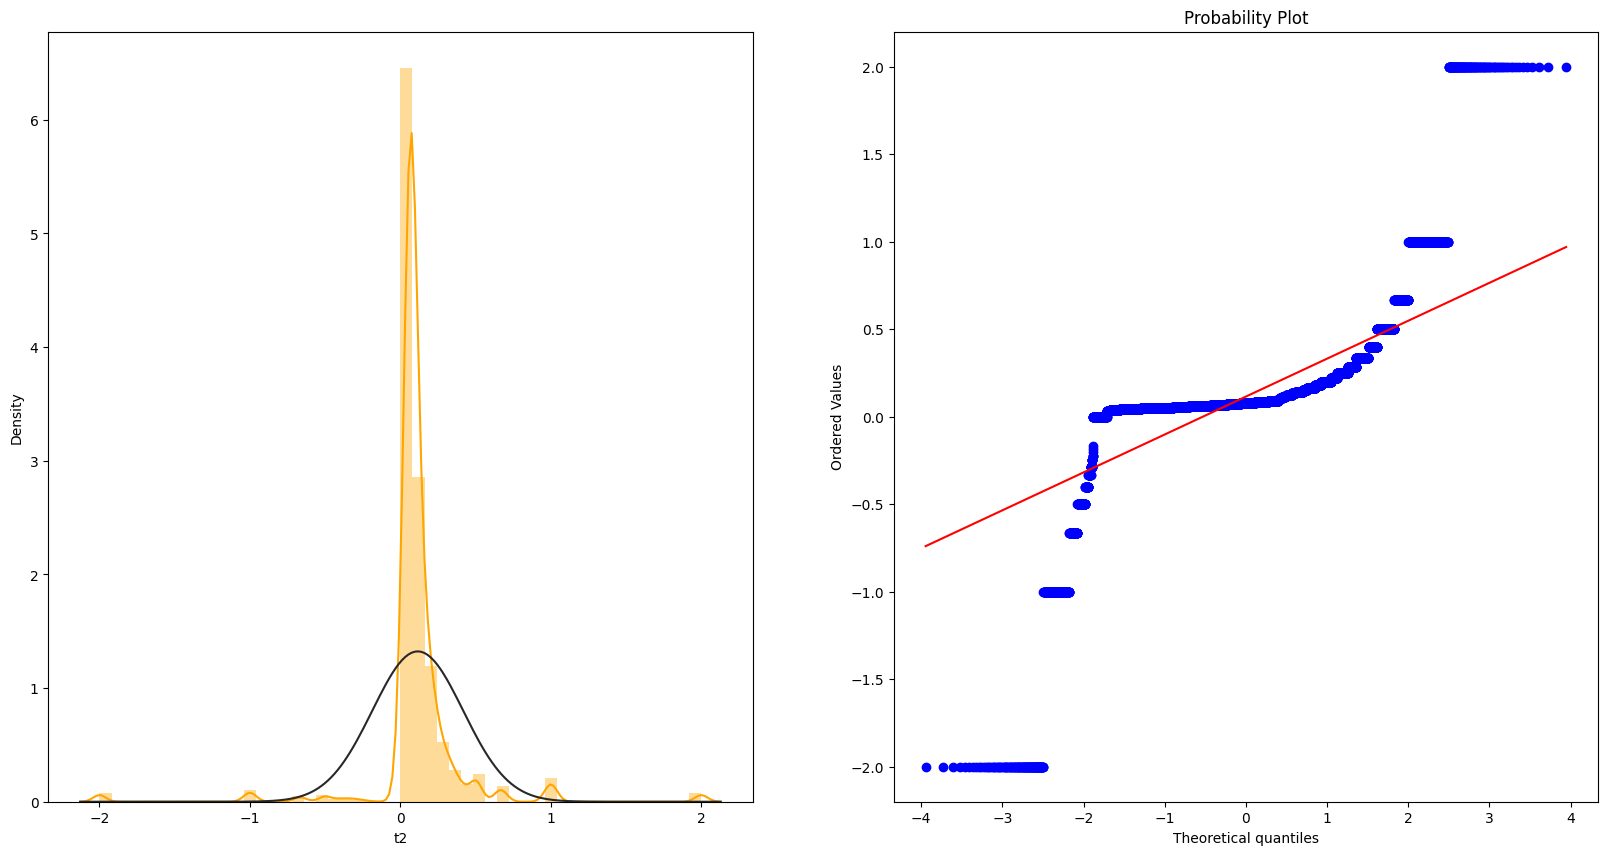

In [ ]:
methods = ['boxcox','log','reciprocal','sqroot','exp']
for method in methods:
  transformations('t2',method)

BoxCox - hum


<ipython-input-47-61c670abbdbc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, fit=norm, color="orange")


hum skewness after boxcox :  -0.12787505300021793 	
hum kurtosis after boxcox :  -0.7268702631810506 

Log - hum


<ipython-input-47-61c670abbdbc>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[col]), fit=norm, color="orange")


hum skewness after log :  -1.111674883178206 	
hum kurtosis after log :  1.1762555971654551 

Reciprocal - hum


<ipython-input-47-61c670abbdbc>:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_r, fit=norm, color="orange")


hum skewness after reciprocal :  1.9474218289129699 	
hum kurtosis after reciprocal :  5.619600663777653 

Square_Root - hum


<ipython-input-47-61c670abbdbc>:61: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]**(1/2), fit=norm, color="orange")


hum skewness after sqroot :  -0.8260156090418967 	
hum kurtosis after sqroot :  0.29277630472048877 

Exponential - hum


<ipython-input-47-61c670abbdbc>:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]**(1/1.2), fit=norm, color="orange")


hum skewness after exp :  -0.6532574631875921 	
hum kurtosis after exp :  -0.10464548522297523 



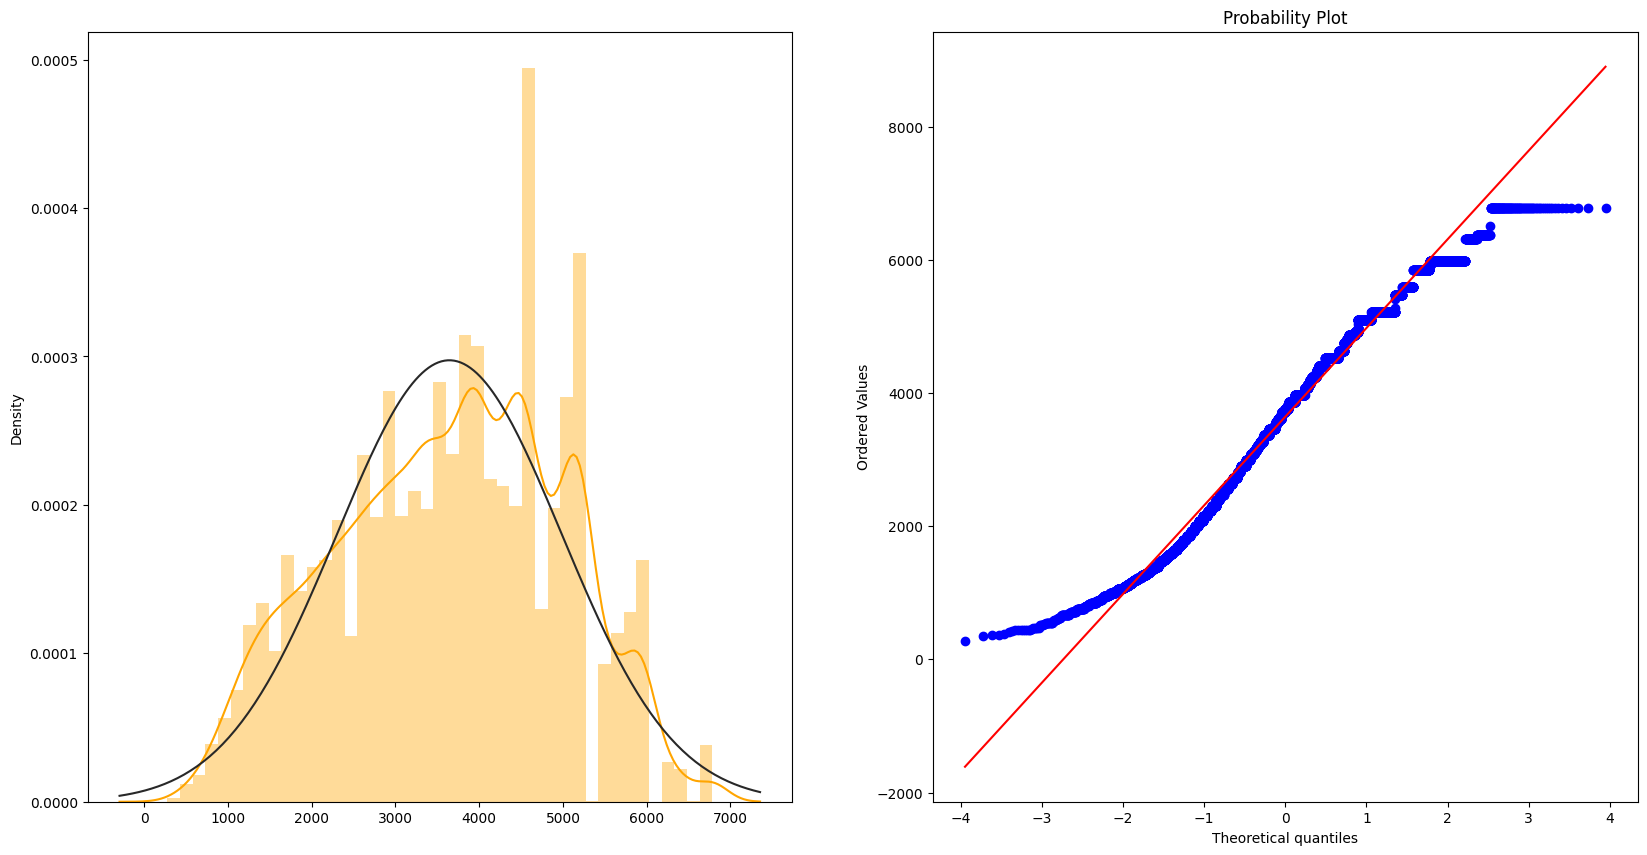

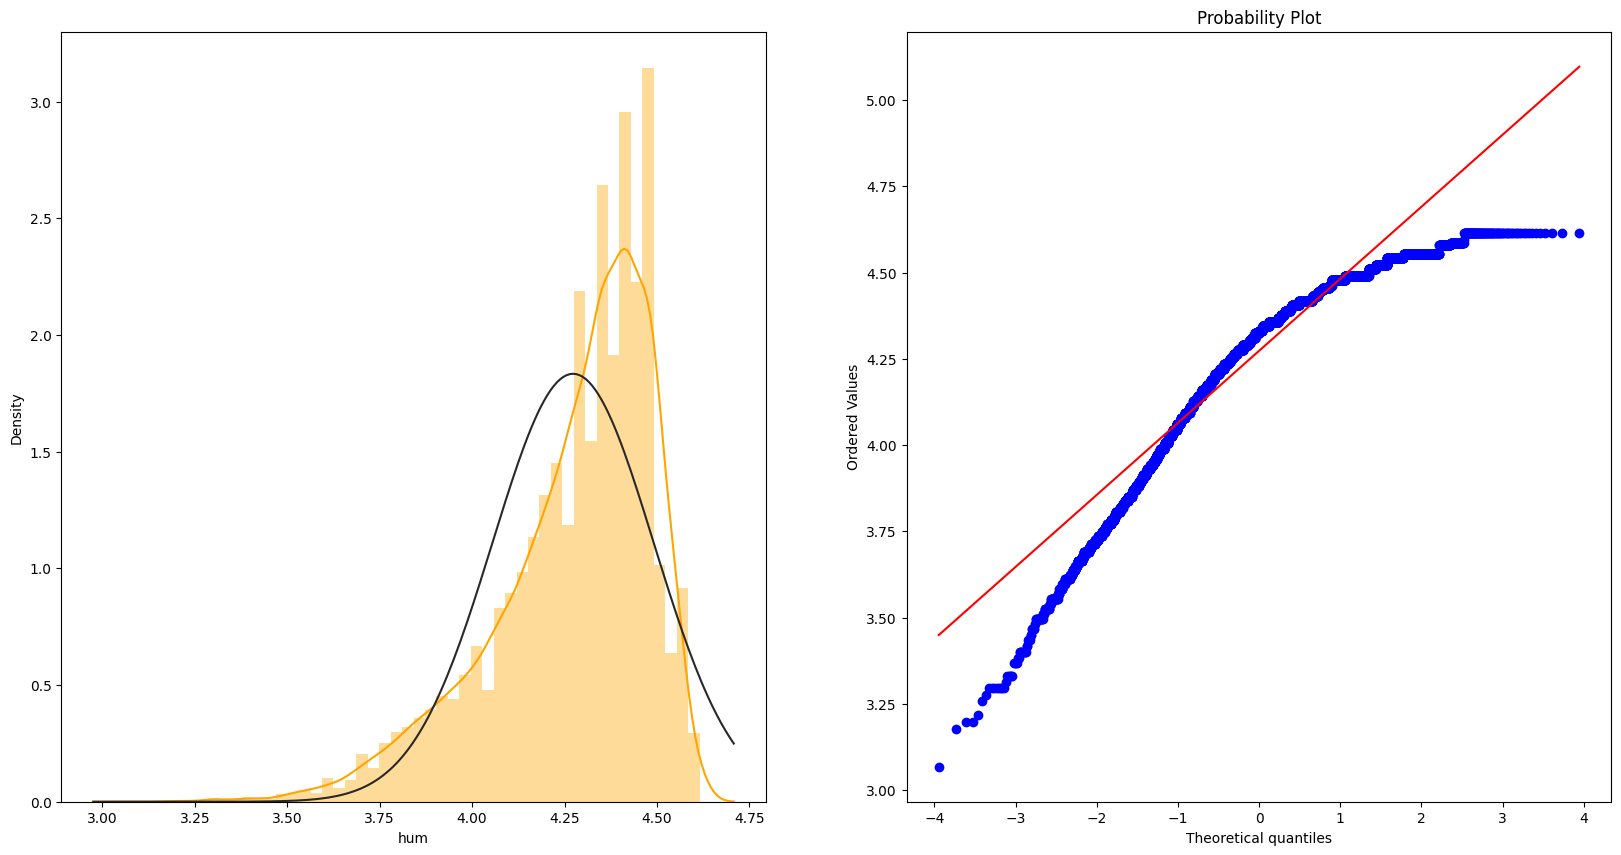

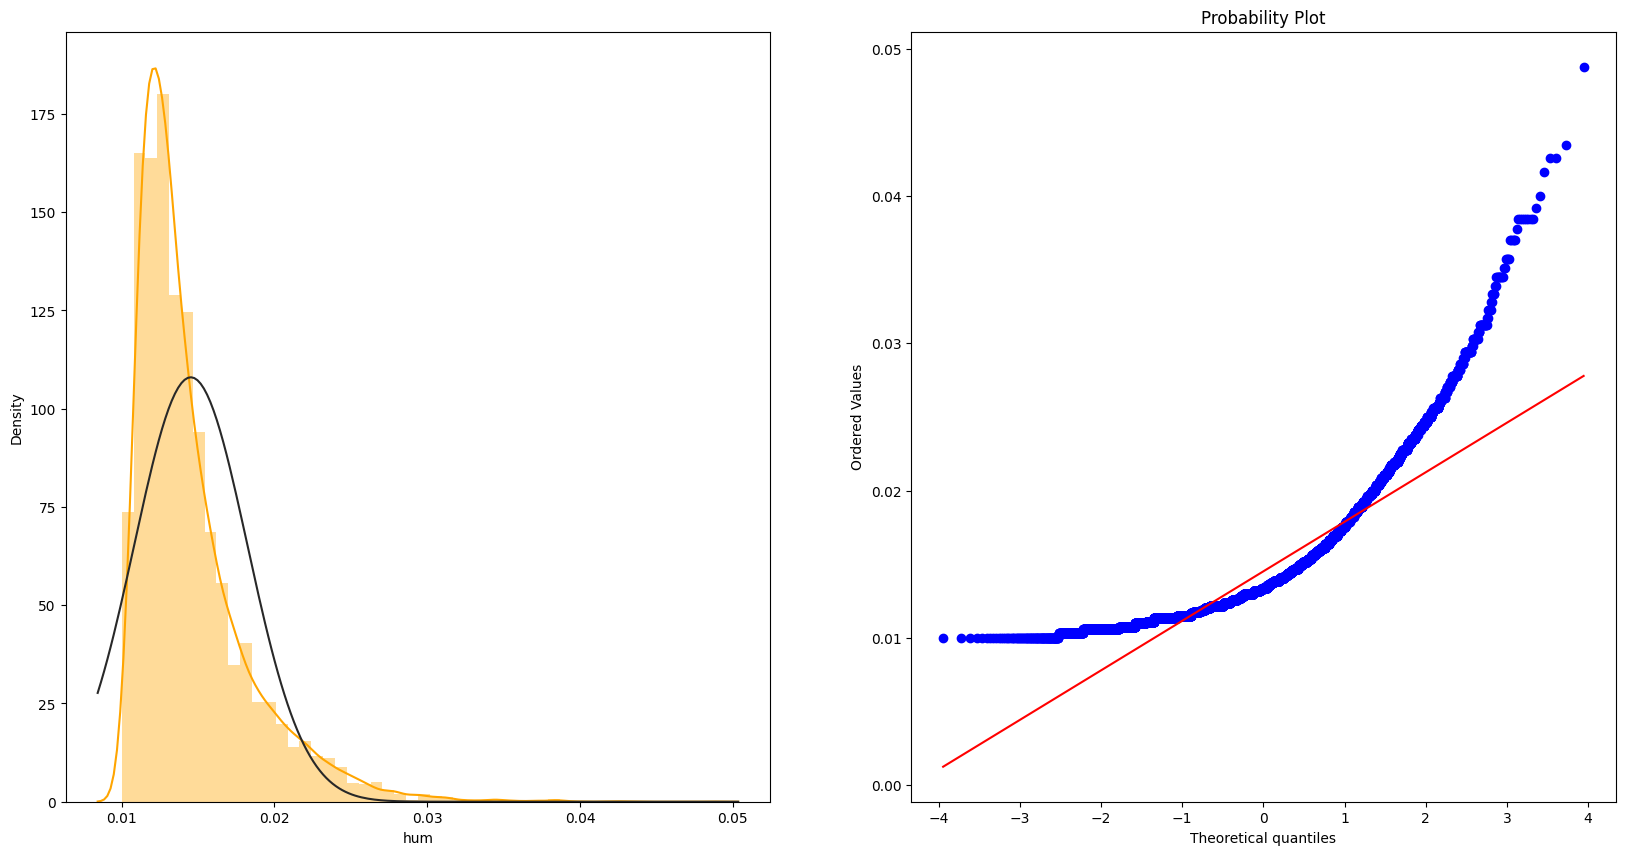

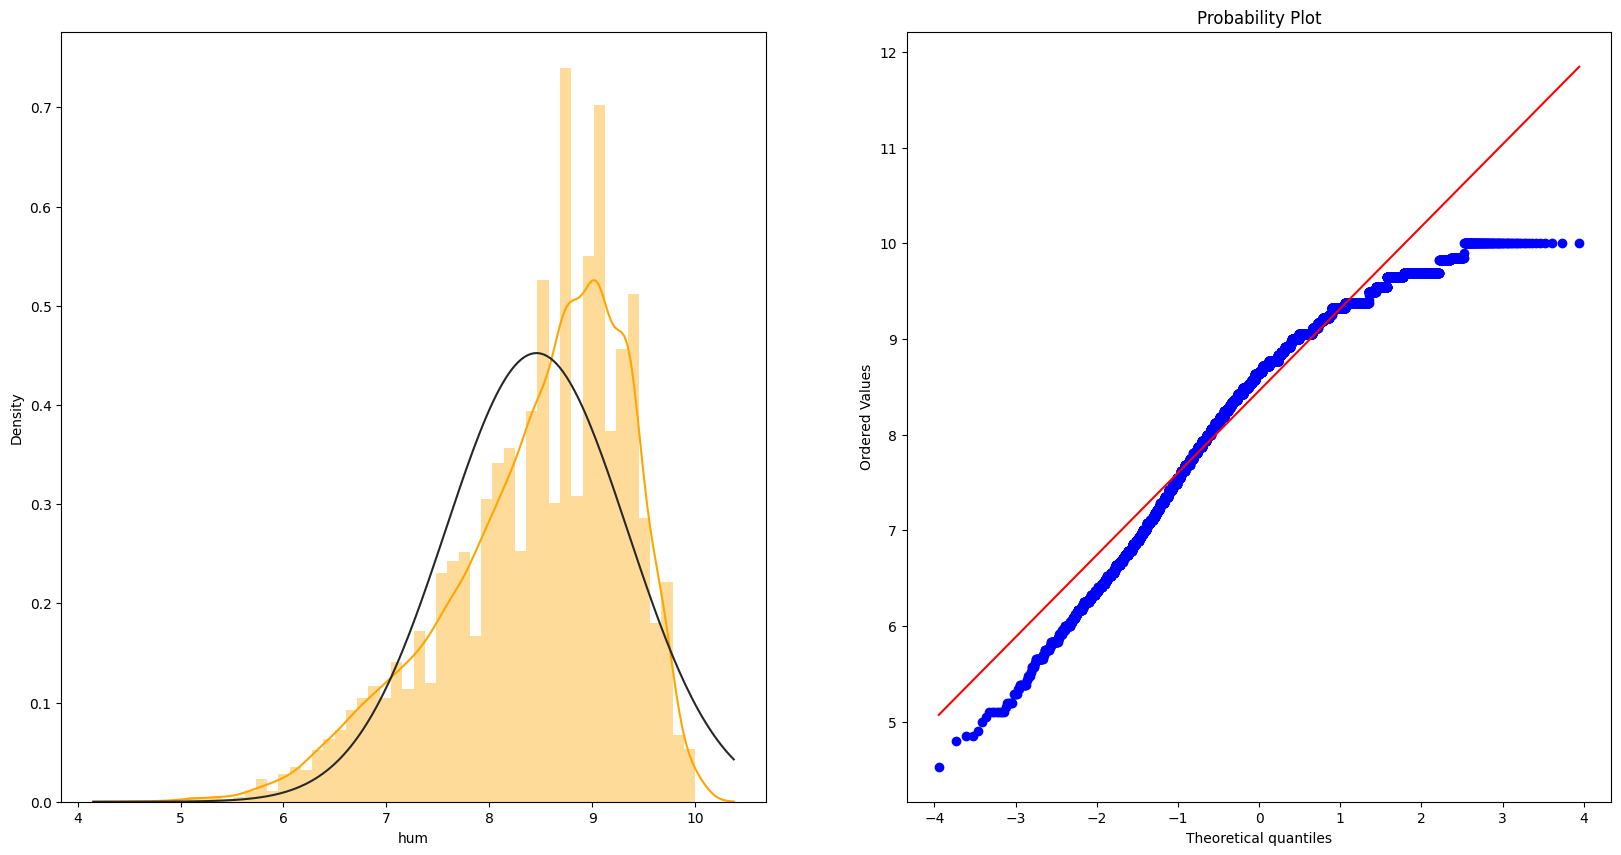

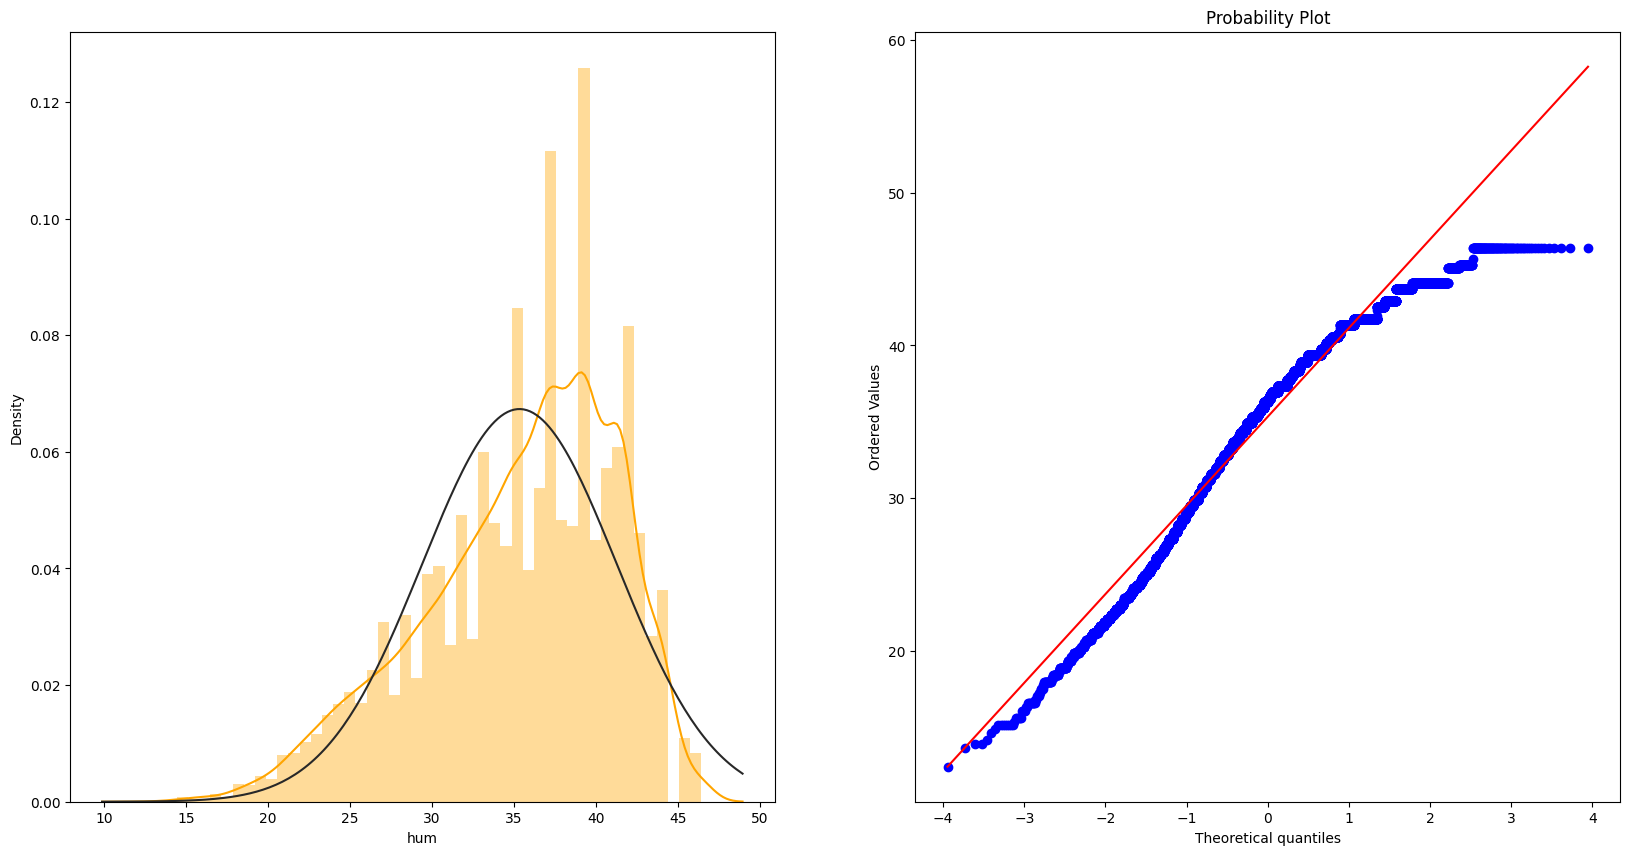

In [ ]:
methods = ['boxcox','log','reciprocal','sqroot','exp']
for method in methods:
  transformations('hum',method)

BoxCox - wind_speed


<ipython-input-47-61c670abbdbc>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp, fit=norm, color="orange")


wind_speed skewness after boxcox :  -0.01107784205505049 	
wind_speed kurtosis after boxcox :  -0.1450353316700097 

Log - wind_speed


<ipython-input-47-61c670abbdbc>:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log1p(df[col]), fit=norm, color="orange")


wind_speed skewness after log :  -0.9289745959453187 	
wind_speed kurtosis after log :  2.138158943145794 

Reciprocal - wind_speed


<ipython-input-47-61c670abbdbc>:44: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp_r, fit=norm, color="orange")


wind_speed skewness after reciprocal :  3.5831110418126406 	
wind_speed kurtosis after reciprocal :  20.117617086985792 

Square_Root - wind_speed


<ipython-input-47-61c670abbdbc>:61: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]**(1/2), fit=norm, color="orange")


wind_speed skewness after sqroot :  -0.12903615576455246 	
wind_speed kurtosis after sqroot :  0.20880899083020488 

Exponential - wind_speed


<ipython-input-47-61c670abbdbc>:78: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col]**(1/1.2), fit=norm, color="orange")


wind_speed skewness after exp :  0.43846052449864326 	
wind_speed kurtosis after exp :  0.07339862395463737 



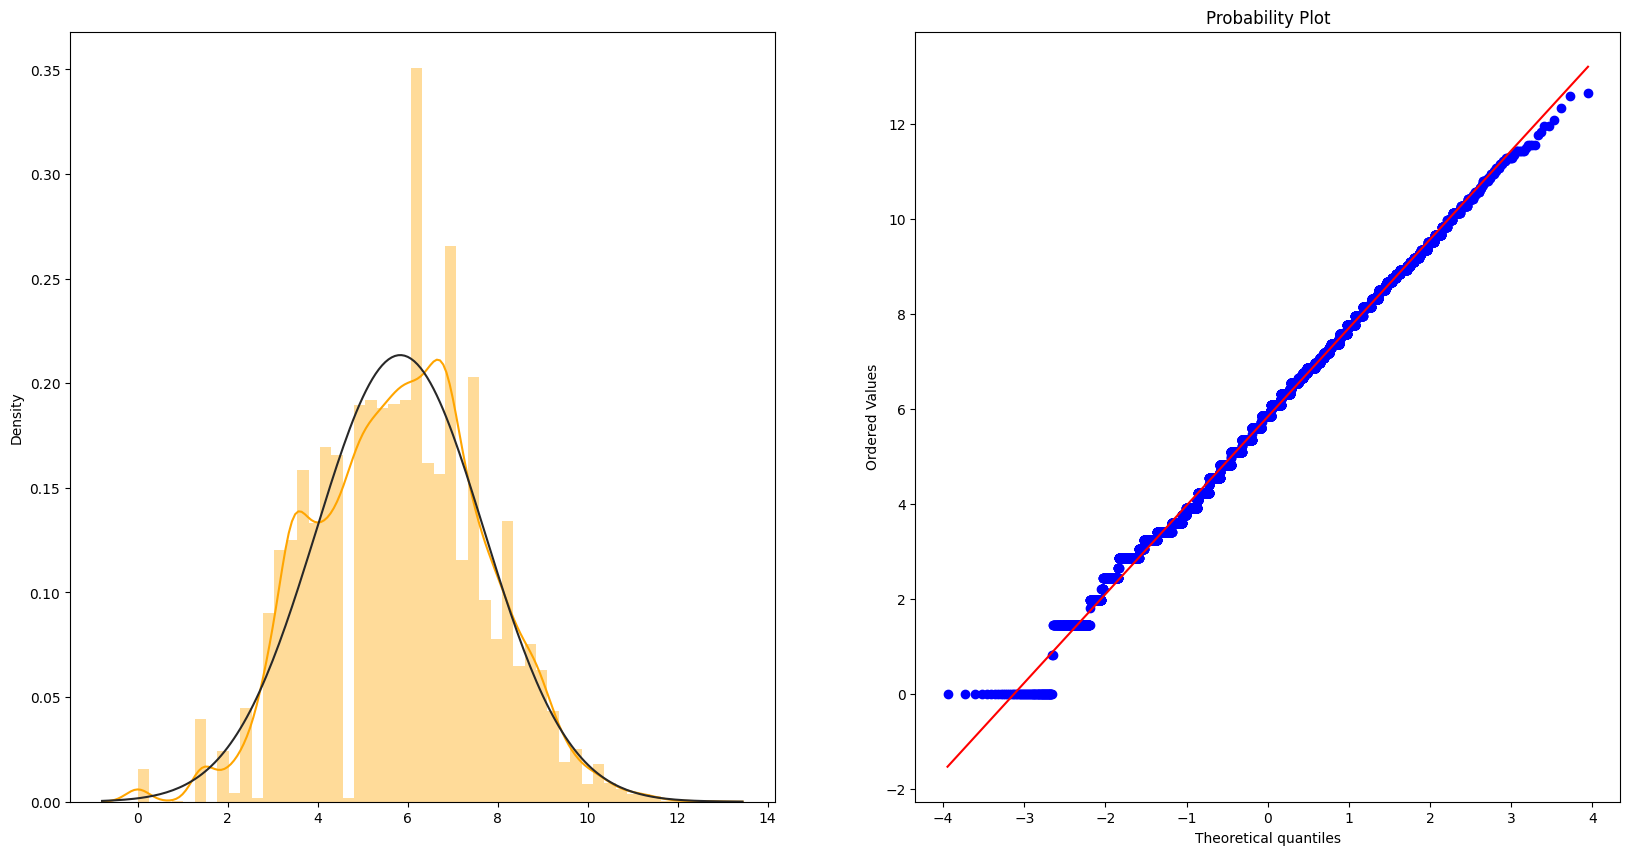

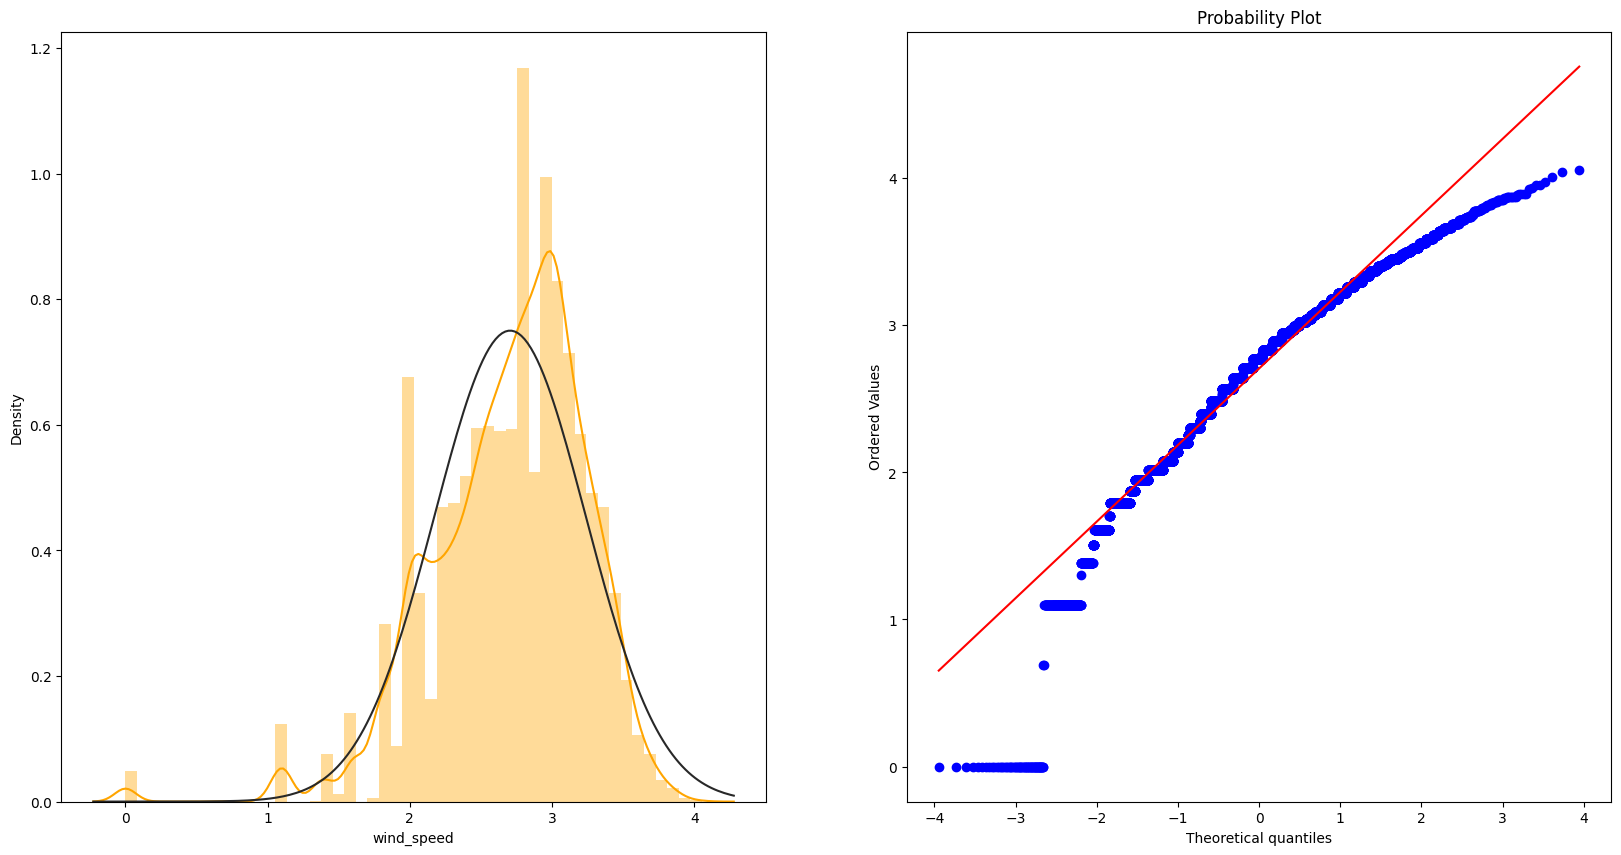

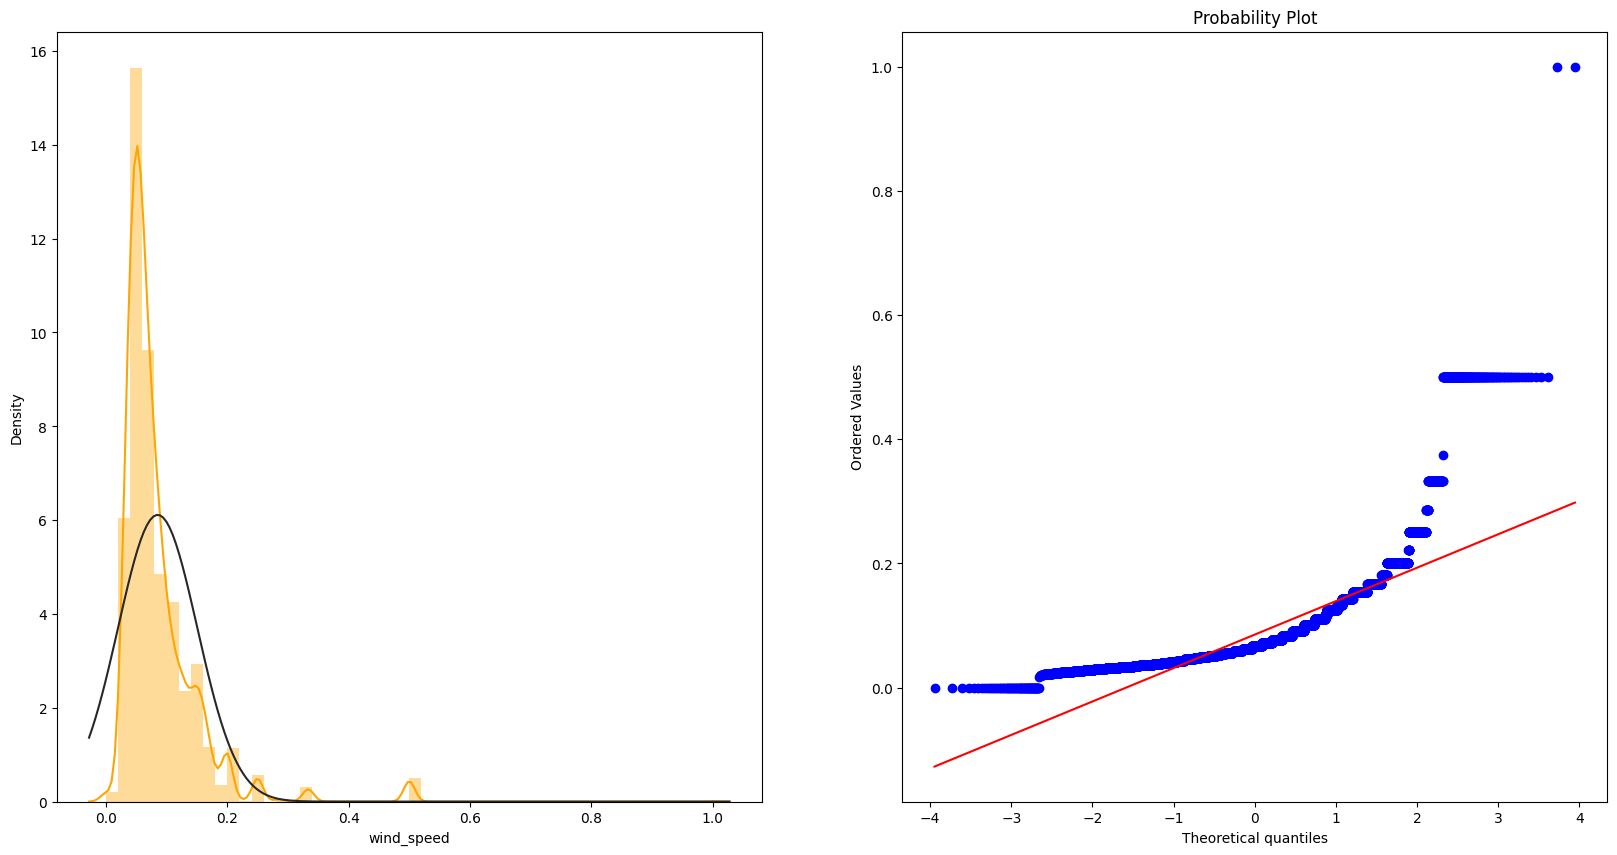

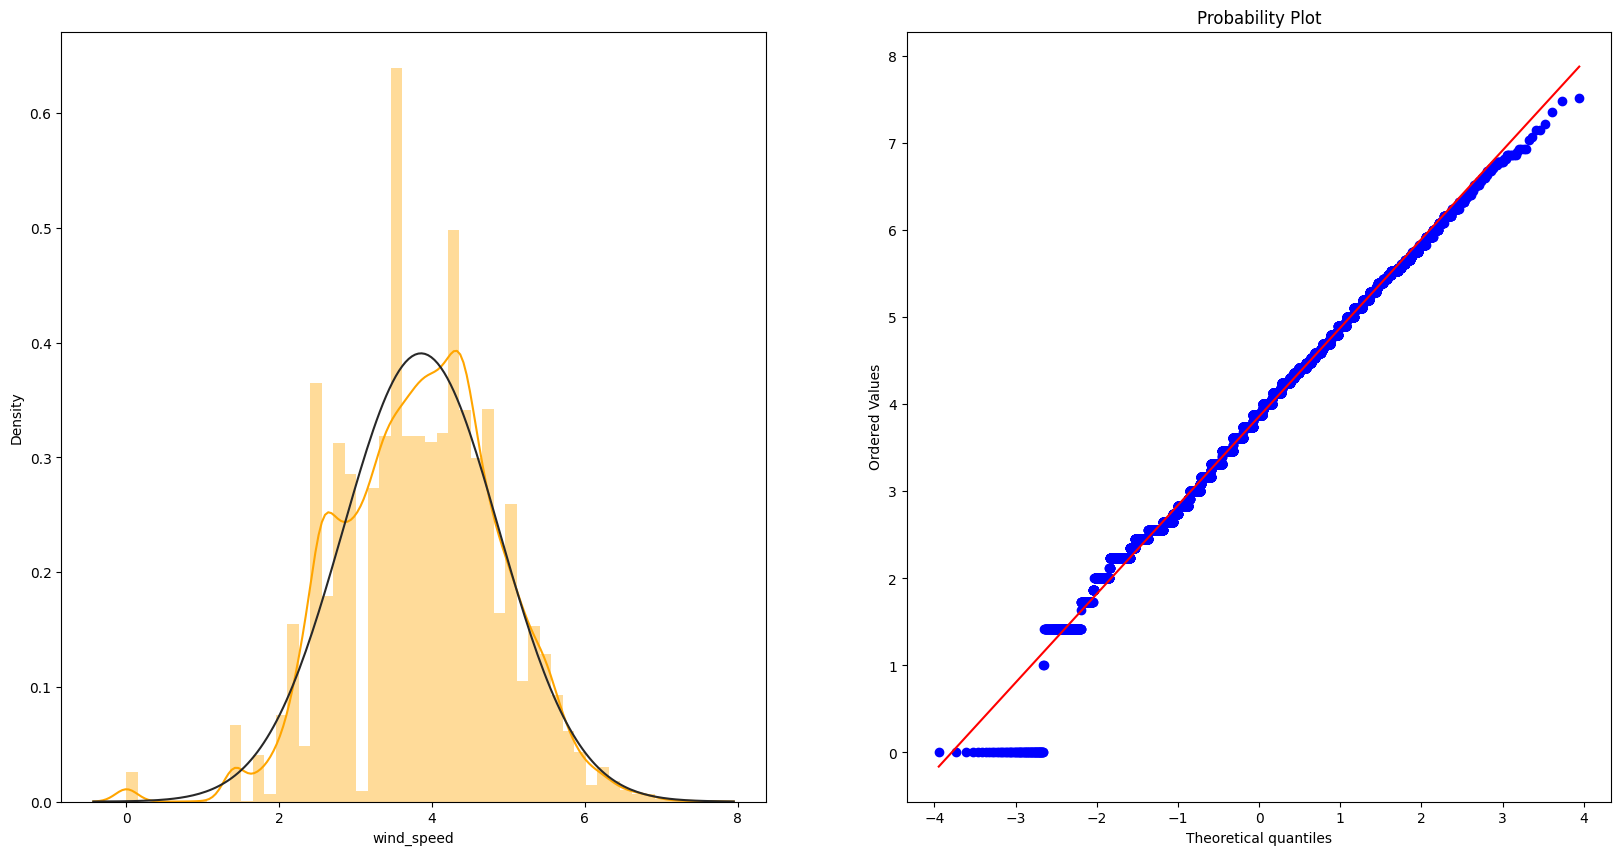

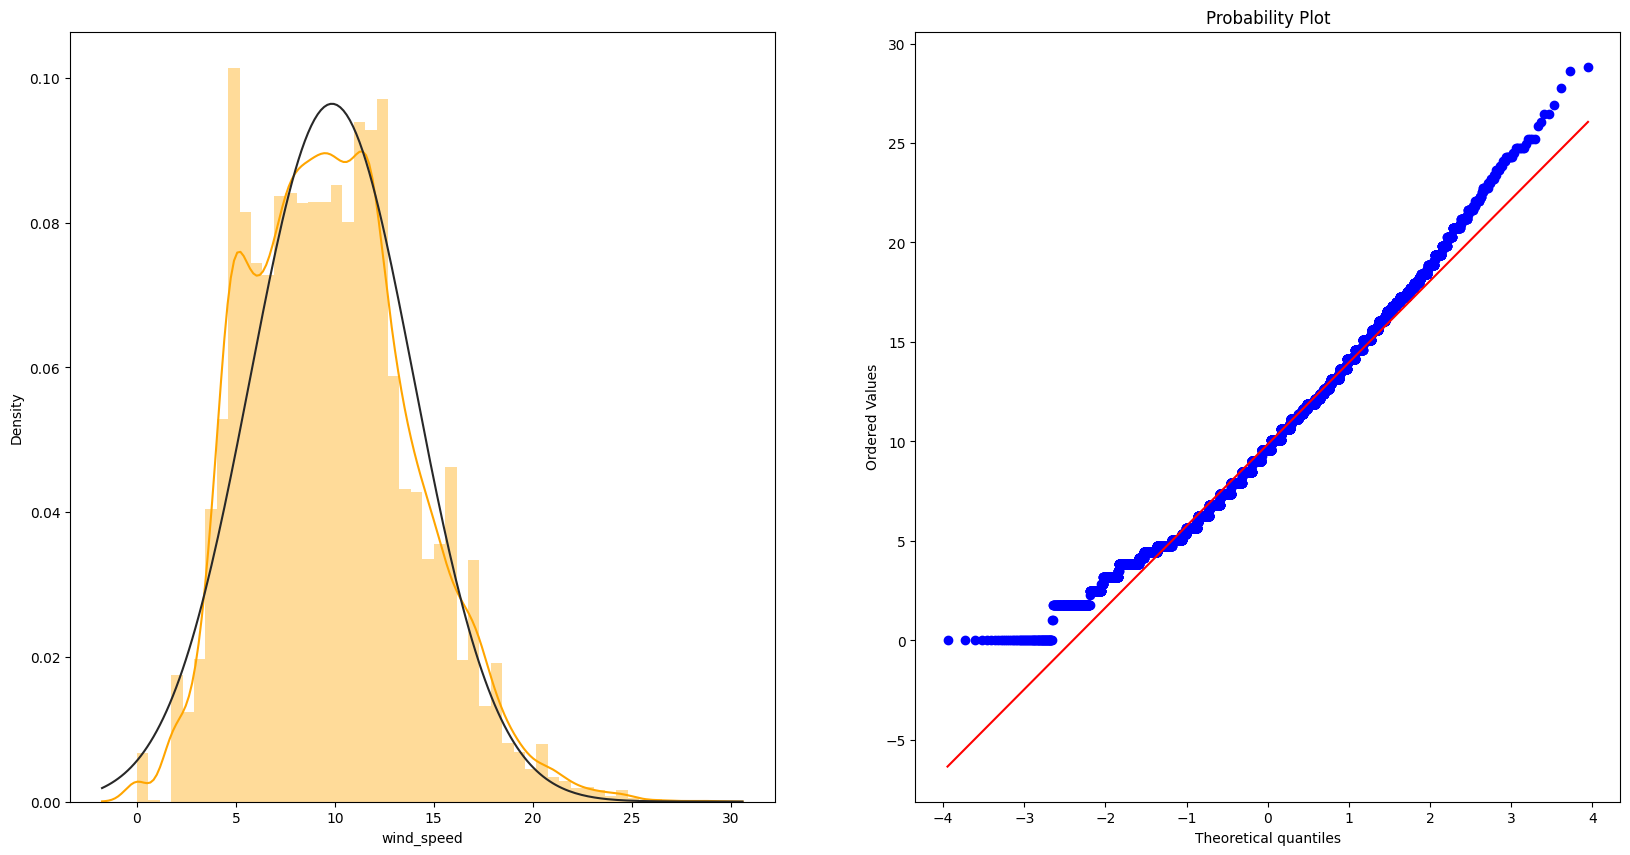

In [ ]:
for method in methods:
  transformations('wind_speed',method)

In [ ]:
# t1,t2는 정규분포를 어느정도 따르는 걸로 보이니 변환이 불 필요, hum과 wind_speed는 box-cox 변환 이후에 가장 정규분포에 가까운 분포를 보이는 것으로 보임.

In [ ]:
df['hum'] = boxcox(df['hum']+1)[0]
df['wind_speed'] = boxcox(df['wind_speed']+1)[0]

In [ ]:
for col in numerical:
  print(col+' outliers : ',check_outliers(col))


t1 outliers :  64
t2 outliers :  19
hum outliers :  0
wind_speed outliers :  121


In [ ]:
def remove_outliers(col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  IQR = q3-q1
  temp=df[(df[col]<=q3+1.5*IQR)&(df[col]>=q1-1.5*IQR)]
  return temp

In [ ]:
for col in numerical:
  df=remove_outliers(col)

In [ ]:
for col in numerical:
  print(col+' outliers : ',check_outliers(col))

t1 outliers :  0
t2 outliers :  0
hum outliers :  0
wind_speed outliers :  0


In [ ]:
scaler = MinMaxScaler()
df[numerical]=scaler.fit_transform(df[numerical])

In [ ]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,month,day,hour
count,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000,17229.000000
mean,1139.481107,0.471795,0.499064,0.513542,0.499732,2.727901,0.021998,0.286436,1.492368,6.518254,3.000697,11.501480
std,1081.130693,0.185526,0.186622,0.206986,0.180865,2.332879,0.146680,0.452109,1.119726,3.454248,2.004175,6.922802
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,255.000000,0.322034,0.342857,0.356143,0.369792,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,6.000000
50%,842.000000,0.474576,0.528571,0.531228,0.500781,2.000000,0.000000,0.000000,1.000000,7.000000,3.000000,11.000000
75%,1661.000000,0.593220,0.628571,0.665855,0.622233,3.000000,0.000000,1.000000,2.000000,10.000000,5.000000,18.000000
max,7860.000000,1.000000,1.000000,1.000000,1.000000,26.000000,1.000000,1.000000,3.000000,12.000000,6.000000,23.000000


In [ ]:
df['month'] = df['timestamp'].dt.month.astype('category')
df['day'] = df['timestamp'].dt.dayofweek.astype('category')
df['hour'] = df['timestamp'].dt.hour.astype('category')

df['weather_code'] = df['weather_code'].astype('category')
df['is_holiday'] = df['is_holiday'].astype('category')
df['is_weekend'] = df['is_weekend'].astype('category')
df['season'] = df['season'].astype('category')

In [ ]:
df=pd.get_dummies(df)

In [ ]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code_1.0,weather_code_2.0,weather_code_3.0,weather_code_4.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,2015-01-04 00:00:00,182,0.152542,0.228571,0.854458,0.240400,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-04 01:00:00,138,0.152542,0.242857,0.854458,0.202369,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-04 04:00:00,47,0.118644,0.171429,0.854458,0.258364,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2015-01-04 05:00:00,46,0.118644,0.228571,0.854458,0.160908,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2015-01-04 06:00:00,51,0.084746,0.142857,1.000000,0.275721,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,0.220339,0.200000,0.630848,0.590878,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
17410,2017-01-03 20:00:00,541,0.220339,0.200000,0.630848,0.632433,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
17411,2017-01-03 21:00:00,337,0.237288,0.214286,0.588356,0.691271,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
17412,2017-01-03 22:00:00,224,0.237288,0.214286,0.547270,0.672084,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader,TensorDataset

import matplotlib.pyplot as plt


In [ ]:
df=df.reset_index()

NameError: ignored

In [ ]:
df.to_csv('london_bike_preprocessed.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
cd/content/gdrive/MyDrive

/content/gdrive/MyDrive


In [ ]:

df = pd.read_csv("london_bike_preprocessed.csv")

In [ ]:
df

,Unnamed: 0,index,timestamp,cnt,t1,t2,hum,wind_speed,weather_code_1.0,weather_code_2.0,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,2015-01-04 00:00:00,182,0.152542,0.228571,0.854458,0.240400,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2015-01-04 01:00:00,138,0.152542,0.242857,0.854458,0.202369,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,2015-01-04 04:00:00,47,0.118644,0.171429,0.854458,0.258364,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,2015-01-04 05:00:00,46,0.118644,0.228571,0.854458,0.160908,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6,2015-01-04 06:00:00,51,0.084746,0.142857,1.000000,0.275721,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17224,17224,17409,2017-01-03 19:00:00,1042,0.220339,0.200000,0.630848,0.590878,0,0,...,0,0,0,0,0,1,0,0,0,0
17225,17225,17410,2017-01-03 20:00:00,541,0.220339,0.200000,0.630848,0.632433,0,0,...,0,0,0,0,0,0,1,0,0,0
17226,17226,17411,2017-01-03 21:00:00,337,0.237288,0.214286,0.588356,0.691271,0,0,...,0,0,0,0,0,0,0,1,0,0
17227,17227,17412,2017-01-03 22:00:00,224,0.237288,0.214286,0.547270,0.672084,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f'{device} is available.')

cpu is available.


In [ ]:
x = df.drop(columns=['timestamp','cnt'])
y = df['cnt']

In [ ]:
x=x.iloc[:,2:]

In [ ]:
x=x.values
y=y.values.reshape(-1,1)

In [ ]:
x.shape

(17229, 62)

In [ ]:
sequence_length = 24
batch_size = 24
input_size = x.shape[1]
hidden_size = 50
num_layers = 2

In [ ]:
def seq_data(x,y,sequence_length):
  x_seq = []
  y_seq = []
  for i in range(len(x)-sequence_length):
    x_seq.append(x[i:i+sequence_length])
    y_seq.append(y[i+sequence_length])
  
  return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view([-1,1])

In [ ]:
seq_len = 24
x_seq,y_seq = seq_data(x,y,seq_len)


In [ ]:
split = 0.8*len(x_seq)
int(split)

13764

In [ ]:
split = int(0.8*len(x_seq))
X_train = x_seq[:split]
y_train = y_seq[:split]
X_test = x_seq[split:]
y_test = y_seq[split:]
print(X_train.size())
print(y_train.size())
print(X_test.size())
print(y_test.size())

torch.Size([13764, 24, 62])
torch.Size([13764, 1])
torch.Size([3441, 24, 62])
torch.Size([3441, 1])


In [ ]:
train = TensorDataset(X_train,y_train)
test = TensorDataset(X_test,y_test)

trainloader = DataLoader(dataset=train,batch_size=batch_size,shuffle=False)
testloader = DataLoader(dataset=test,batch_size=batch_size,shuffle=False)

In [ ]:
class BiLSTM(nn.Module):
  def __init__(self,input_size,hidden_size,sequence_length,num_layers,device):
    super().__init__()
    self.device = device
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.rnn = nn.LSTM(input_size,hidden_size,num_layers,batch_first=True,bidirectional=True)
    self.fc = nn.Linear(hidden_size*sequence_length*2,1)
  
  def forward(self,x):
    h0 = torch.zeros(self.num_layers*2, x.size()[0],self.hidden_size).to(self.device)
    c0 = torch.zeros(self.num_layers*2, x.size()[0],self.hidden_size).to(self.device)
    out,_ = self.rnn(x,(h0,c0))
    out = out.reshape(out.shape[0],-1)
    out = self.fc(out)
    return out
  
model = BiLSTM(input_size = input_size, hidden_size = hidden_size, sequence_length = sequence_length, num_layers = num_layers,device=device).to(device)

In [ ]:
criterion = nn.MSELoss()
lr = 1e-3
num_epochs=200
optimizer = optim.Adam(model.parameters(),lr=lr)

In [ ]:
loss_ = []
n=len(trainloader)

for epoch in range(0,100):
  running_loss = 0.0

  for data in trainloader:
    inputs,values = data[0].to(device),data[1].to(device)
    outputs = model(inputs)
    loss = criterion(outputs,values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  
  loss_.append(running_loss/n)



In [ ]:
loss_

[393484.9800778273,
 92165.62770917482,
 75137.728236721,
 66184.44191234879,
 60873.389417713326,
 58131.86656174087,
 53467.69742220837,
 52923.286092134345,
 50690.20769623142,
 48549.861830632726,
 46402.605769252594,
 45481.37611143598,
 40900.194885290824,
 41331.13613076459,
 40136.62490551453,
 39551.462807229334,
 37089.829572936396,
 35297.47148999662,
 33358.13491755518,
 31777.305030440562,
 29303.283324286665,
 30595.568945223975,
 27540.307663585812,
 28577.032958457316,
 27357.09161046324,
 25268.140954539052,
 23267.49982713579,
 23500.817586785903,
 20806.220498086,
 21668.793127744713,
 20184.05456658426,
 20199.49304409834,
 19273.41875309755,
 18148.678363336752,
 17148.954511418196,
 15395.47138543835,
 15027.646411478574,
 15491.559637047474,
 14559.10102158164,
 14349.20793067491,
 14136.769605899959,
 14793.490715970871,
 12491.6014584091,
 13273.715716139135,
 13602.802872047845,
 10953.258306701295,
 11129.923780080746,
 9894.85185924009,
 9679.548910148218,
 

In [ ]:
model.eval()
y_pred=[]
with torch.no_grad():
  for data in testloader:
    inputs = data[0].to(device)
    values = data[1].to(device)
    outputs = model(inputs)
    y_pred += outputs.cpu().numpy().tolist()

In [ ]:
y_test=y_test.cpu()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lstm

332.0326750711576

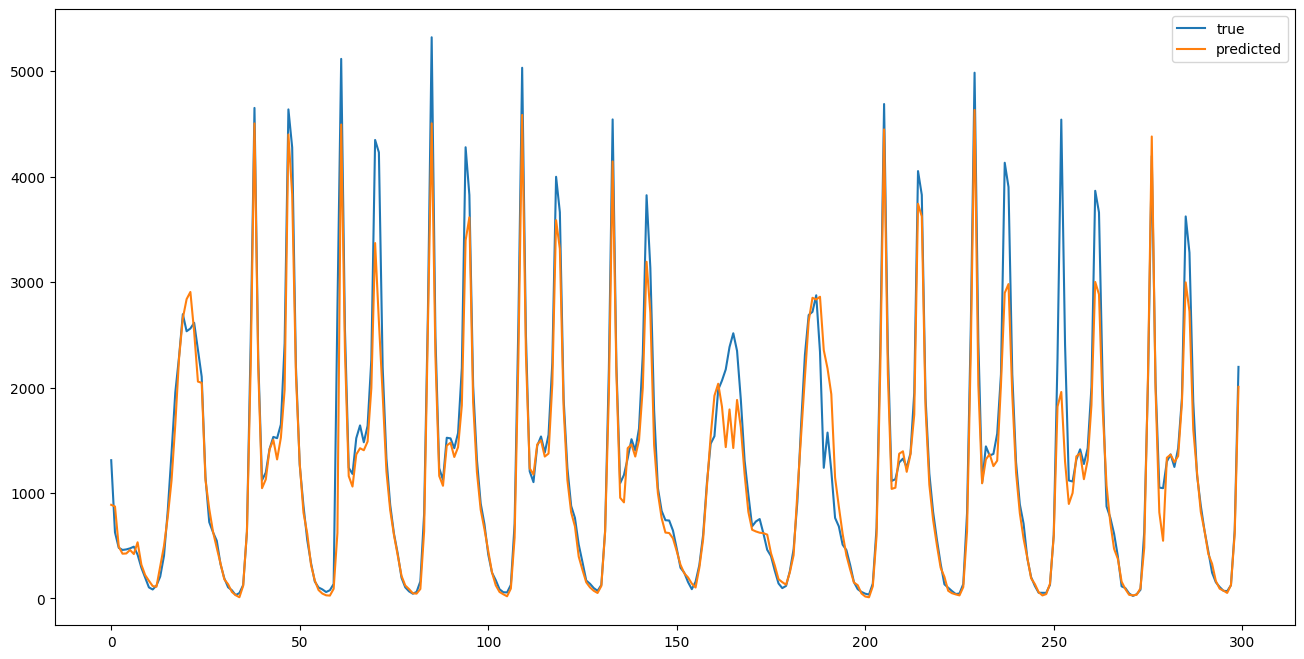

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[1200:1500], label='true')
plt.plot(y_pred[1200:1500], label='predicted')
plt.legend()

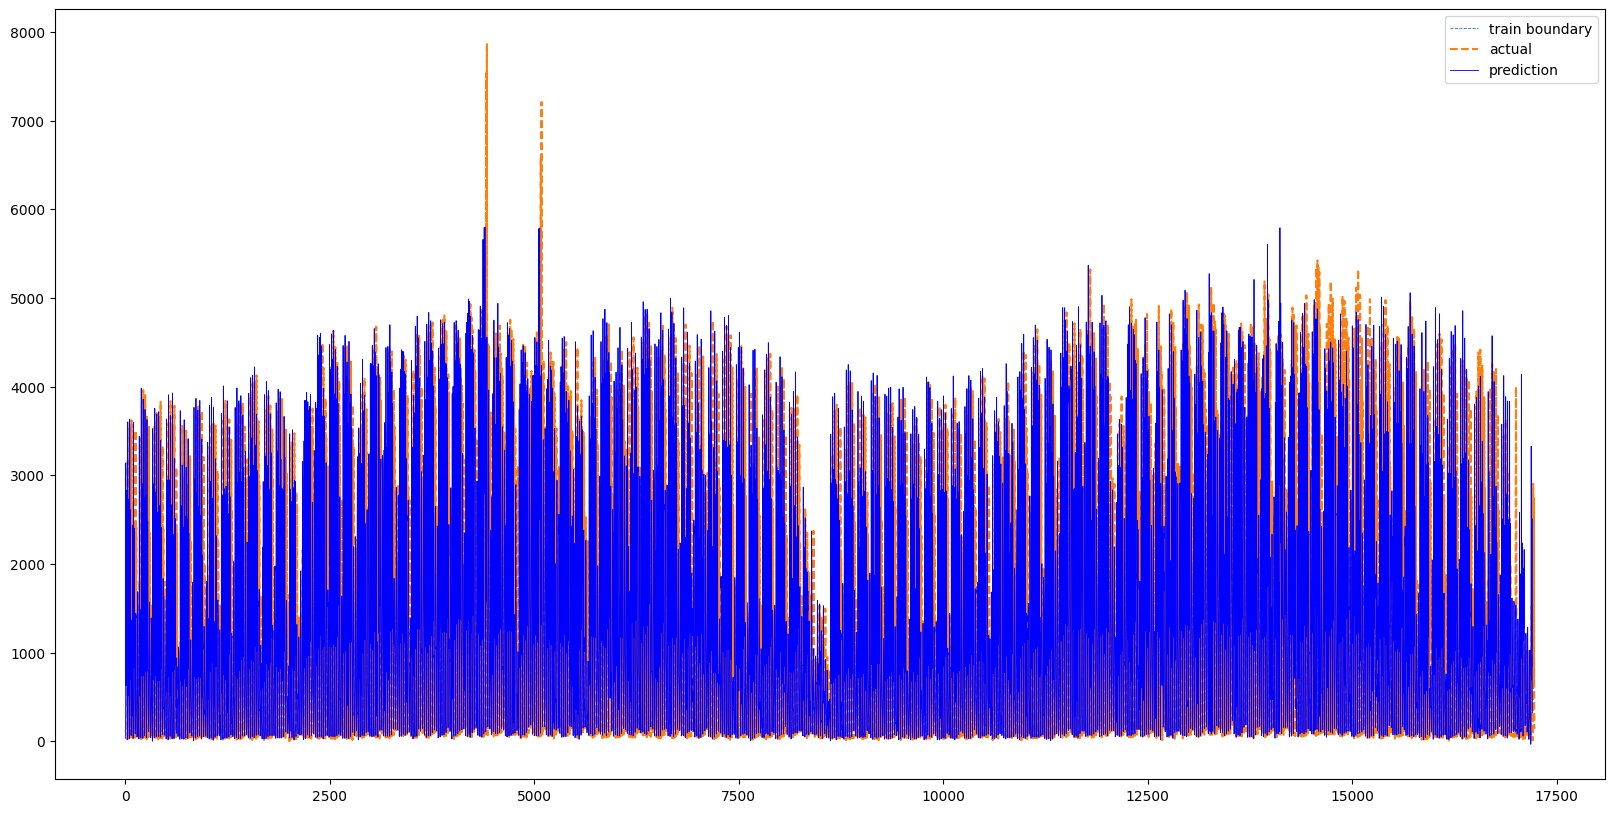

In [ ]:
def plotting(train_loader, test_loader, actual):
  with torch.no_grad():
    train_pred = []
    test_pred = []

    for data in train_loader:
      seq,target = data
      out = model(seq)
      train_pred += out.cpu().numpy().tolist()
    
    for data in test_loader:
      seq,target = data
      out = model(seq)
      test_pred += out.cpu().numpy().tolist()
    
  total = train_pred + test_pred
  plt.figure(figsize=(20,10))
  plt.plot(np.ones(100)*len(train_pred),np.linspace(0,1,100),'--',linewidth=0.6)
  plt.plot(actual,'--')
  plt.plot(total,'b',linewidth=0.6)

  plt.legend(['train boundary','actual','prediction'])
  plt.show()

plotting(trainloader,testloader,df['cnt'][sequence_length:])


In [ ]:
split = int(0.8*len(x))
X_train = x[:split]
y_train = y[:split]
X_test = x[split:]
y_test = y[split:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13783, 62)
(13783, 1)
(3446, 62)
(3446, 1)


In [ ]:
X_train= torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test= torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

In [ ]:
train = TensorDataset(X_train,y_train)
test = TensorDataset(X_test,y_test)

trainloader = DataLoader(dataset=train,batch_size=batch_size,shuffle=False)
testloader = DataLoader(dataset=test,batch_size=batch_size,shuffle=False)

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader,Dataset
import torch.nn.functional as F

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
input_size

62

In [ ]:
class Regressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(62,100,bias=True)
    self.fc0 = nn.Linear(100,50,bias=True)
    self.fc2 = nn.Linear(50,30,bias=True)
    self.fc3 = nn.Linear(30,1,bias=True)
    self.dropout = nn.Dropout(0.2)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc0(x))
    x = self.dropout(F.relu(self.fc2(x)))
    x = F.relu(self.fc3(x))

    return x

In [ ]:
model = Regressor()
criterion  = nn.MSELoss()
criterion2 = nn.L1Loss()
optimizer = optim.Adam(model.parameters(),lr=0.001,weight_decay=1e-7)

In [ ]:
n = len(trainloader)
loss_ = []
for epoch in range(100):
  running_loss = 0.0
  for data in trainloader:
    inputs,labels = data[0],data[1]
    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  
  loss_.append(running_loss/n)


In [ ]:
model.eval()
y_pred=[]
with torch.no_grad():
  for data in testloader:
    inputs = data[0].to(device)
    values = data[1].to(device)
    outputs = model(inputs)
    y_pred += outputs.cpu().numpy().tolist()

In [ ]:
rmse_reg = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_reg

307.7739310038281

In [ ]:
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer

In [ ]:
y

array([[182],
       [138],
       [ 47],
       ...,
       [337],
       [224],
       [139]])

In [ ]:
split = int(0.8*len(x))
X_train = x[:split]
y_train = y[:split]
X_test = x[split:]
y_test = y[split:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13783, 62)
(13783,)
(3446, 62)
(3446,)


In [ ]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train,y_train)

y_pred = xgbmodel.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 327.323135


In [ ]:
xgbmodel.feature_importances_

array([7.2233444e-03, 4.2181476e-03, 1.6482653e-02, 8.5826061e-04,
       8.0645230e-04, 3.1175115e-03, 3.1381934e-03, 7.5394503e-04,
       3.2088058e-03, 5.1148050e-04, 1.2809351e-04, 9.2339069e-03,
       0.0000000e+00, 4.3999933e-02, 0.0000000e+00, 4.7179696e-04,
       2.9065066e-03, 1.1049500e-03, 3.8946692e-03, 2.8723839e-04,
       1.7790357e-04, 9.5608016e-04, 9.3988358e-04, 8.5956923e-04,
       9.8401401e-04, 7.5802585e-04, 1.3260031e-03, 6.9273240e-04,
       3.1409364e-03, 1.0342763e-03, 1.8985926e-03, 8.1258733e-04,
       6.0637342e-04, 6.3999894e-04, 1.6853953e-03, 1.6806904e-03,
       6.9137377e-04, 7.1624125e-04, 3.6662694e-02, 5.1874783e-02,
       7.3385313e-02, 3.9935663e-02, 4.8390236e-02, 6.5748118e-02,
       1.8449027e-02, 2.6161656e-02, 1.4931989e-01, 2.9487185e-02,
       2.7653014e-03, 3.5443120e-03, 3.9930996e-03, 4.1288948e-03,
       3.1466647e-03, 5.3775273e-03, 2.4021912e-02, 1.0134823e-01,
       8.1176519e-02, 2.5217241e-02, 1.8853926e-03, 1.0324331e

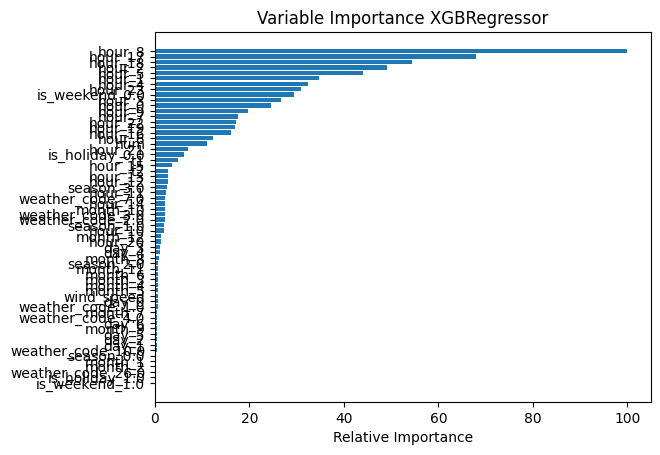

In [ ]:
def plot_importance(model):
    """
    Fuction to plot variable importance from machine learning model.
    Note: the model requires to have "model.feature_importances_".
    
    Inputs
    -------
    - model: a model with a object ".feature_importances_"

    Returns
    -------
    - feature importance plot
    

    """

    feature_importance = model.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title(f'Variable Importance {model.__class__.__name__}')
    plt.show()

plot_importance(xgbmodel)